In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#ok for this instead of predicting the raw values we will predict the difference of the target from the mean

In [2]:
train = pd.read_csv('Data/train_data_new.csv')
test = pd.read_csv('Data/test_data_new.csv')
# train = pd.read_csv('Data/train_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])
# test = pd.read_csv('Data/test_data_new.csv', usecols=['file', 'sample','ENC_POS_FLOATMAG_BH', 'dENC_X', 'ddENC_X', 'FLOATMAG_ACC_ADC_PORT_0', 'DAC_FLOATMAG_BH'])

train, test

(        sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  POS_ERR_FLOATMAG_BH  \
 0            0                 -3.0                 -3.0                  0.0   
 1            1                 -3.0                 -2.0                 -1.0   
 2            2                 -3.0                 -2.0                 -1.0   
 3            3                 -3.0                 -4.0                  1.0   
 4            4                 -3.0                 -1.0                 -2.0   
 ...        ...                  ...                  ...                  ...   
 188805    7791              99997.0              99998.0                 -1.0   
 188806    7792              99997.0              99998.0                 -1.0   
 188807    7793              99997.0              99998.0                 -1.0   
 188808    7794              99997.0              99999.0                 -2.0   
 188809    7795              99997.0              99996.0                  1.0   
 
         DAC_F

In [3]:
train

sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  POS_ERR_FLOATMAG_BH  \
0            0                 -3.0                 -3.0                  0.0   
1            1                 -3.0                 -2.0                 -1.0   
2            2                 -3.0                 -2.0                 -1.0   
3            3                 -3.0                 -4.0                  1.0   
4            4                 -3.0                 -1.0                 -2.0   
...        ...                  ...                  ...                  ...   
188805    7791              99997.0              99998.0                 -1.0   
188806    7792              99997.0              99998.0                 -1.0   
188807    7793              99997.0              99998.0                 -1.0   
188808    7794              99997.0              99999.0                 -2.0   
188809    7795              99997.0              99996.0                  1.0   

        DAC_FLOATMAG_BH  FLOATMAG_ACC_ADC_PORT_0  dENC_X  ddENC_X  \
0                -203.0                   -125.0     NaN      NaN   
1                -209.0                    190.0     1.0      NaN   
2                -206.0                    -77.0     0.0     -1.0   
3                -182.0                     95.0    -2.0     -2.0   
4                -191.0                    -97.0     3.0      5.0   
...                 ...                      ...     ...      ...   
188805            262.0                    -49.0    -3.0     -3.0   
188806            252.0                    -65.0     0.0      3.0   
188807            250.0                     25.0     0.0      0.0   
188808            245.0                    -73.0     1.0      1.0   
188809            261.0                     27.0    -3.0     -4.0   

        rolling_mean_ENC_POS_10  rolling_var_ENC_POS_10  ...  \
0                           NaN                     NaN  ...   
1                           NaN                     NaN  ...   
2                           NaN                     NaN  ...   
3                           NaN                     NaN  ...   
4                           NaN                     NaN  ...   
...                         ...                     ...  ...   
188805                 100000.6                2.266669  ...   
188806                 100000.2                2.622225  ...   
188807                  99999.8                2.622225  ...   
188808                  99999.6                2.488892  ...   
188809                  99999.4                3.600003  ...   

        rolling_mean_POS_ERR_10  rolling_var_POS_ERR_10  \
0                           NaN                     NaN   
1                           NaN                     NaN   
2                           NaN                     NaN   
3                           NaN                     NaN   
4                           NaN                     NaN   
...                         ...                     ...   
188805                     -3.6                2.266667   
188806                     -3.2                2.622222   
188807                     -2.8                2.622222   
188808                     -2.6                2.488889   
188809                     -2.4                3.600000   

        rolling_slope_POS_ERR_10  rolling_mean_POS_ERR_30  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   
...                          ...                      ...   
188805                  0.181818                -3.200000   
188806                  0.230303                -3.233333   
188807                  0.230303                -2.966667   
188808                  0.193939                -3.066667   
188809                  0.496970                -2.933333

In [4]:
prediction_timestep = 1

train["target"] = train.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)
test["target"] = test.groupby("file")["FLOATMAG_ACC_ADC_PORT_0"].shift(-prediction_timestep)

In [ ]:
#calculating new targets (difference from mean target)

#so to calculate the mean we first have to 'align' the data

#we should check out the original data and make sure that the comand possitions are in alignment based on sample number

In [22]:
# filenames = [i for i in os.listdir('Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/') if i.endswith(".dat")]

# train_data = pd.DataFrame()

# num_files_in_train = 24

# # Loop through each file
# for i in np.random.choice(len(filenames), num_files_in_train, replace = False):
#     # Read the data from the file
#     data = pd.read_csv(f'Data/FLOATMAG_BH_Datalog_2023_10_17 09.37.30 _Samp=8000/{filenames[i]}', delimiter="\t")
    
#     # Check if 'sample' column exists and set it as index
#     if 'sample' in data.columns:
#         data.set_index('sample', inplace=True)
    
#     # Extract the "CMD_POS_FLOATMAG_BH" column and rename it
#     column = data["CMD_POS_FLOATMAG_BH"].rename(f'CMD_POS_FLOATMAG_BH_{i}')
    
#     # Concatenate the extracted column to the train_data DataFrame
#     train_data = pd.concat([train_data, column], axis=1)

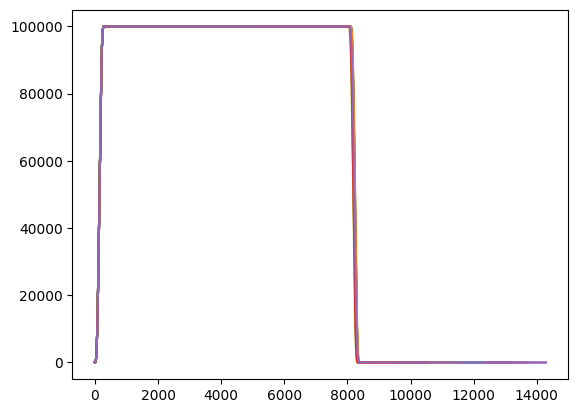

In [49]:
# #looks aligned, either way what are we going to do even if it wasnt?

# for i in train_data.columns:
#     plt.plot(train_data[i])

In [5]:
train.set_index(["file", "sample"], inplace = True)
test.set_index(["file", "sample"], inplace = True)

In [6]:
mean_target_values_train = train.groupby("sample")["target"].mean()
# mean_target_values_test = test.groupby("sample")["target"].mean() #was a mistake to do this for test aswell, the distribution should only be based on train

mean_encoder_values_train = train.groupby("sample")["ENC_POS_FLOATMAG_BH"].mean()
# mean_encoder_values_test = test.groupby("sample")["ENC_POS_FLOATMAG_BH"].mean()

In [7]:
train["mean_target"] = train.index.get_level_values("sample").map(mean_target_values_train)
test["mean_target"] = test.index.get_level_values("sample").map(mean_target_values_train) #not an error here, use the train distribution for test aswell

train["mean_encoder"] = train.index.get_level_values("sample").map(mean_encoder_values_train)
test["mean_encoder"] = test.index.get_level_values("sample").map(mean_encoder_values_train)

In [8]:
train["target_difference"] = train["target"] - train["mean_target"]
test["target_difference"] = test["target"] - test["mean_target"]

train["encoder_difference"] = train["ENC_POS_FLOATMAG_BH"] - train["mean_encoder"]
test["encoder_difference"] = test["ENC_POS_FLOATMAG_BH"] - test["mean_encoder"]

In [9]:
train = train.reset_index()[train.reset_index()["sample"] < 7500]
test = test.reset_index()[test.reset_index()["sample"] < 7500]

In [10]:
train

file  sample  CMD_POS_FLOATMAG_BH  ENC_POS_FLOATMAG_BH  \
0          0       0                 -3.0                 -3.0   
1          0       1                 -3.0                 -2.0   
2          0       2                 -3.0                 -2.0   
3          0       3                 -3.0                 -4.0   
4          0       4                 -3.0                 -1.0   
...      ...     ...                  ...                  ...   
188509    29    7495              99997.0              99996.0   
188510    29    7496              99997.0             100003.0   
188511    29    7497              99997.0              99998.0   
188512    29    7498              99997.0              99999.0   
188513    29    7499              99997.0             100001.0   

        POS_ERR_FLOATMAG_BH  DAC_FLOATMAG_BH  FLOATMAG_ACC_ADC_PORT_0  dENC_X  \
0                       0.0           -203.0                   -125.0     NaN   
1                      -1.0           -209.0                    190.0     1.0   
2                      -1.0           -206.0                    -77.0     0.0   
3                       1.0           -182.0                     95.0    -2.0   
4                      -2.0           -191.0                    -97.0     3.0   
...                     ...              ...                      ...     ...   
188509                  1.0            281.0                    190.0    -7.0   
188510                 -6.0            228.0                   -101.0     7.0   
188511                 -1.0            268.0                    154.0    -5.0   
188512                 -2.0            250.0                   -122.0     1.0   
188513                 -4.0            243.0                    217.0     2.0   

        ddENC_X  rolling_mean_ENC_POS_10  ...  rolling_var_POS_ERR_30  \
0           NaN                      NaN  ...                     NaN   
1           NaN                      NaN  ...                     NaN   
2          -1.0                      NaN  ...                     NaN   
3          -2.0                      NaN  ...                     NaN   
4           5.0                      NaN  ...                     NaN   
...         ...                      ...  ...                     ...   
188509     -6.0                 100001.4  ...                3.086207   
188510     14.0                 100001.4  ...                3.086207   
188511    -12.0                 100001.1  ...                3.489655   
188512      6.0                 100001.0  ...                3.678161   
188513      1.0                 100001.2  ...                3.678161   

        rolling_slope_POS_ERR_30  rolling_mean_POS_ERR_50  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   
...                          ...                      ...   
188509                  0.010456                    -3.66   
188510                 -0.009566                    -3.76   
188511                  0.016463                    -3.76   
188512                  0.034705                    -3.74   
188513                  0.039155                    -3.82   

        rolling_var_POS_ERR_50  rolling_slope_POS_ERR_50  target  mean_target  \
0                          NaN                       NaN   190.0    14.000000   
1                          NaN                       NaN   -77.0     3.000000   
2                          NaN                       NaN    95.0    17.083333   
3                          NaN                       NaN   -97.0     4.500000   
4                          NaN                       NaN   114.0    10.875000   
...                        ...                       ...     ...          ...   
188509                4.228980                 -0.060456  -101.0 

In [11]:
for i in train["file"].unique():

    print(train[train["file"] == i]['encoder_difference'].max(), train[train["file"] == i]['encoder_difference'].argmax()) 

28.125 85
17.125 85
11.333333333328483 1243
23.875 88
12.833333333328483 232
11.875 264
41.45833333332848 175
24.375 86
13.625 75
13.166666666664241 159
35.95833333333394 87
18.458333333328483 170
36.45833333333576 164
30.20833333333394 80
32.91666666667152 169
10.416666666666515 56
10.25 5969
11.875 217
17.75 83
20.95833333333576 139
23.125 85
19.41666666666606 93
15.83333333333394 84
11.583333333328483 600


In [12]:
for i in test["file"].unique():

    print(test[test["file"] == i]['encoder_difference'].max(), test[test["file"] == i]['encoder_difference'].argmax()) 

21.95833333333394 87
30.291666666671517 185
23.95833333333394 87
27.33333333333394 82
30.75 83
14.458333333328483 209


In [40]:
#after segmenting the data to the first 7500 time steps only we see that the target difference is significantly less, because the second spike (which was there for some trials and not for others, and not aligned properly, was removed)

for i in train["file"].unique():

    print(train[train["file"] == i]['target_difference'].max(), train[train["file"] == i]['target_difference'].argmax()) 

398.4583333333333 517
332.6666666666667 1503
346.1363636363636 2229
291.82608695652175 1839
400.82608695652175 1640
354.91666666666697 300
393.2173913043478 1910
449.83333333333303 159
416.52173913043475 1766
424.91666666666606 188
409.875 960
329.54166666666606 206
390.0 219
373.08333333333337 1444
529.583333333333 160
357.75 1298
366.41666666666606 103
331.1363636363636 2304
347.6 2950
374.375 182
336.57142857142856 2423
342.79166666666663 1578
337.54166666666606 206
340.55 3152


In [ ]:
# train.xs(8350, level="sample")

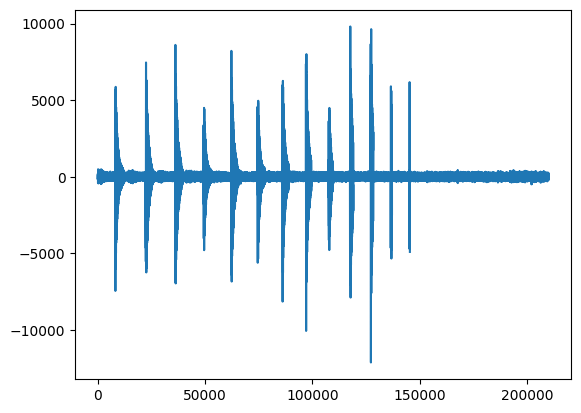

In [73]:
#with full data
plt.plot(train["target_difference"].values)

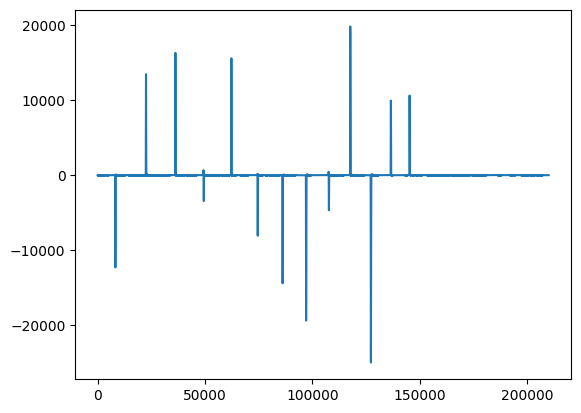

In [9]:
#also full data
#I reckon alignment should be based on the command position as I dont think that changes
#or something definetely there with the cmd position that we should explore
#Questions to ask:
#  Does the command position get updated as the run progresses?
#  Is it the same motion profile every time?
plt.plot(train["encoder_difference"].values)

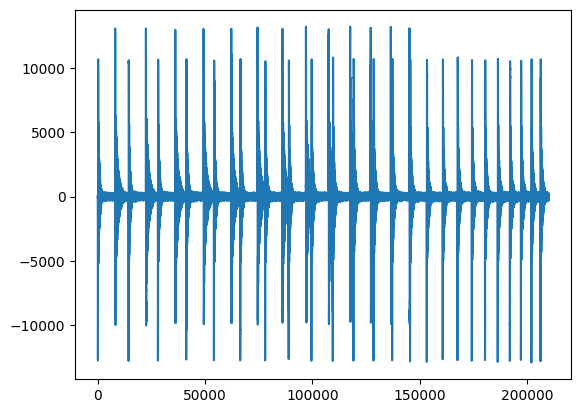

In [82]:
#also full data
plt.plot(train["target"].values)

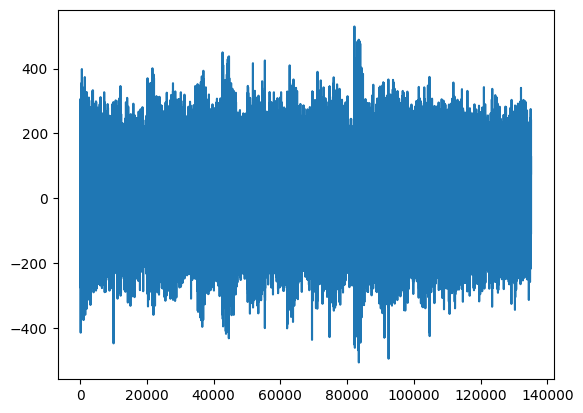

In [41]:
#data segmented to first 7500 time steps
plt.plot(train["target_difference"].values)

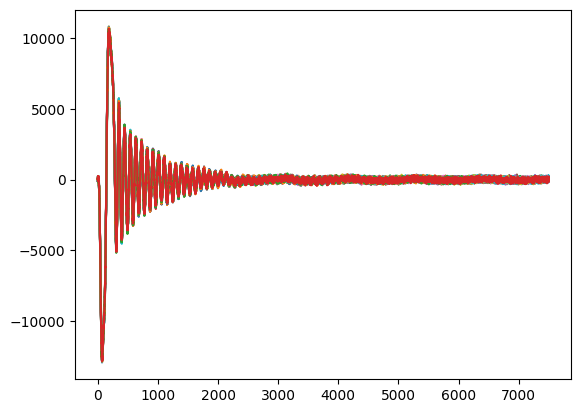

In [13]:

for series in train.groupby("file")["target"]:
    plt.plot(series[1].values)

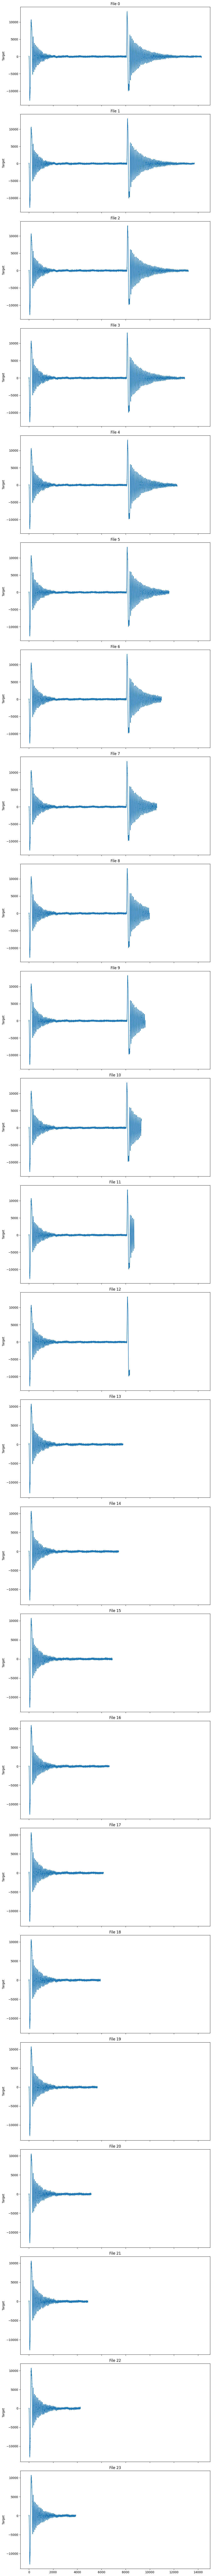

In [81]:
#for full data, (not segmented to first 7500 samples)
# Get the number of unique 'file' values to determine the number of subplots needed
num_files = train.index.get_level_values("file").nunique()

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_files, 1, figsize=(10, 5*num_files), sharex=True) # Adjust the figure size as needed

# Iterate over each group from groupby
for (file, data), ax in zip(train.groupby("file")["target"], axes):
    # Plot the 'target' series in its own subplot
    ax.plot(data.values)
    ax.set_title(f'File {file}')
    ax.set_ylabel('Target')

# Show the plot with subplots stacked vertically
plt.tight_layout()
plt.show()

In [14]:


train_columns = train.columns.drop(["file", "sample", "CMD_POS_FLOATMAG_BH", "FLOATMAG_ACC_ADC_PORT_0", "target", "mean_target", "mean_encoder"])

In [15]:
train_columns

Index(['ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH',
       'dENC_X', 'ddENC_X', 'rolling_mean_ENC_POS_10',
       'rolling_var_ENC_POS_10', 'rolling_slope_ENC_POS_10',
       'rolling_mean_ENC_POS_30', 'rolling_var_ENC_POS_30',
       'rolling_slope_ENC_POS_30', 'rolling_mean_ENC_POS_50',
       'rolling_var_ENC_POS_50', 'rolling_slope_ENC_POS_50', 'dDAC', 'ddDAC',
       'rolling_mean_DAC_10', 'rolling_var_DAC_10', 'rolling_slope_DAC_10',
       'rolling_mean_DAC_30', 'rolling_var_DAC_30', 'rolling_slope_DAC_30',
       'rolling_mean_DAC_50', 'rolling_var_DAC_50', 'rolling_slope_DAC_50',
       'dPOS_ERR', 'ddPOS_ERR', 'rolling_mean_POS_ERR_10',
       'rolling_var_POS_ERR_10', 'rolling_slope_POS_ERR_10',
       'rolling_mean_POS_ERR_30', 'rolling_var_POS_ERR_30',
       'rolling_slope_POS_ERR_30', 'rolling_mean_POS_ERR_50',
       'rolling_var_POS_ERR_50', 'rolling_slope_POS_ERR_50',
       'target_difference', 'encoder_difference'],
      dtype='object')

In [16]:
#now lets fit a dense model to the data

X = train[train_columns].dropna()
y = X.pop("target_difference")
y = np.expand_dims(y, axis=-1)

X_test = test[train_columns].dropna()
y_test = X_test.pop("target_difference")
y_test = np.expand_dims(y_test, axis=1)

In [17]:
X.shape, y.shape, X_test.shape, y_test.shape

((147498, 37), (147498, 1), (28578, 37), (28578, 1))

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Normalization

mae = tf.keras.metrics.mean_absolute_error

2023-11-16 23:45:03.280019: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 23:45:03.515474: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 23:45:03.515513: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 23:45:03.517465: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 23:45:03.636577: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 23:45:03.639960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
#I guess we should probably also calulate the difference from mean for the encoder data aswell due to the large variation in encoder data

In [19]:
input_norm = Normalization(axis=-1)

input_norm.adapt(X)

2023-11-16 23:45:07.790570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 23:45:07.791040: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
# output_norm = Normalization(axis=-1)

# output_norm.adapt(y)

In [48]:
model = Sequential([
    input_norm,
    Dense(200, activation='relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)  # Output layer with 1 unit
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
one_trial_file_index = test["file"].unique()[3]
print(f"one trial file index: {one_trial_file_index}")

one_trial_columns = list(train_columns)
one_trial_columns.extend(["mean_target", "target"])

one_trial_test = test[test["file"] == one_trial_file_index]

X_test_one_trial = one_trial_test[one_trial_columns].dropna()

y_test_one_trial = X_test_one_trial.pop("target_difference")
y_test_one_trial = np.expand_dims(y_test_one_trial, axis=1)

y_mean_one_trial = X_test_one_trial.pop("mean_target")
y_mean_one_trial = np.expand_dims(y_mean_one_trial, axis=1)

y_target_one_trial = X_test_one_trial.pop("target")
y_target_one_trial = np.expand_dims(y_target_one_trial, axis=1)

one trial file index: 16


In [31]:
X_test_one_trial.shape, y_test_one_trial.shape, y_mean_one_trial.shape, y_target_one_trial.shape

((2694, 37), (2694, 1), (2694, 1), (2694, 1))

In [37]:
# inverse_output_norm = Normalization(axis=-1, invert=True)

# inverse_output_norm.adapt(y)

In [23]:
0.335 * 8000

2680.0

mae reference: 115.513
epoch 50
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11640.4287 - mae: 87.8209 - val_loss: 14810.3662 - val_mae: 99.9406
Epoch 2/2
85/85 [==============================] - 0s 914us/step


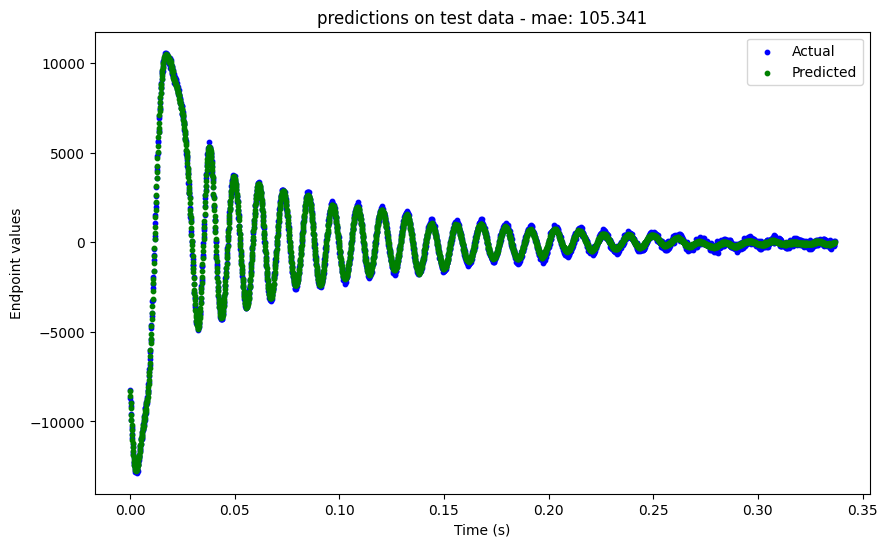

epoch 51
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11631.4502 - mae: 87.7928 - val_loss: 14857.6230 - val_mae: 100.1195
Epoch 2/2
85/85 [==============================] - 0s 918us/step


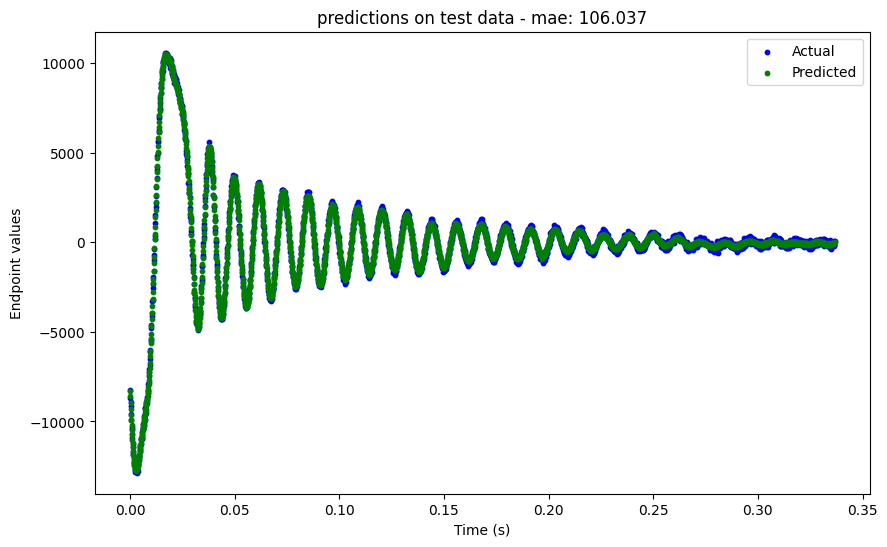

epoch 52
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11612.4297 - mae: 87.7008 - val_loss: 14868.7188 - val_mae: 99.9964
Epoch 2/2
85/85 [==============================] - 0s 916us/step


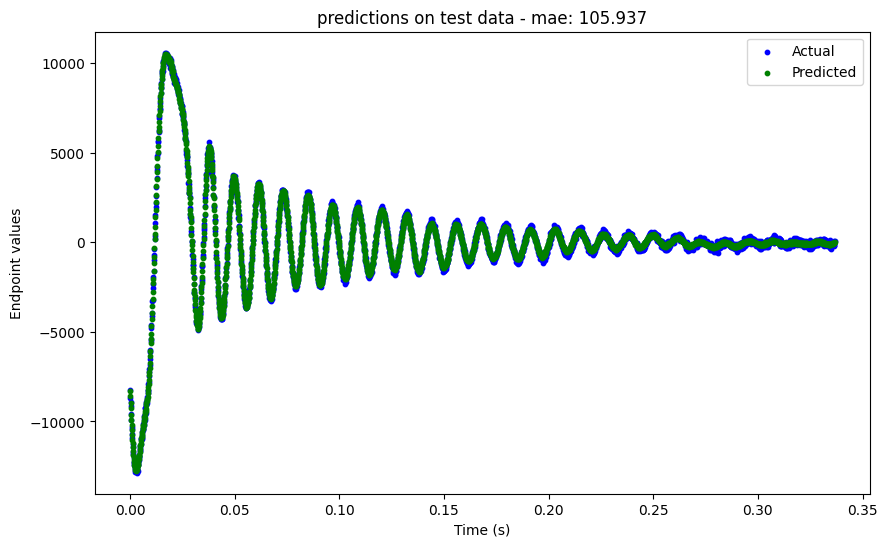

epoch 53
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11618.3691 - mae: 87.7224 - val_loss: 14838.1602 - val_mae: 100.0547
Epoch 2/2
85/85 [==============================] - 0s 929us/step


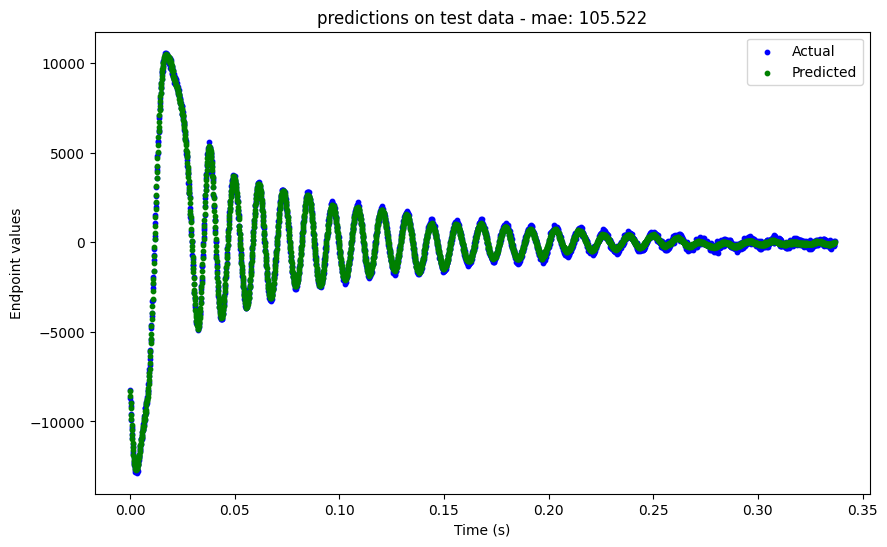

epoch 54
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11596.7979 - mae: 87.6158 - val_loss: 14894.3789 - val_mae: 100.1508
Epoch 2/2
85/85 [==============================] - 0s 891us/step


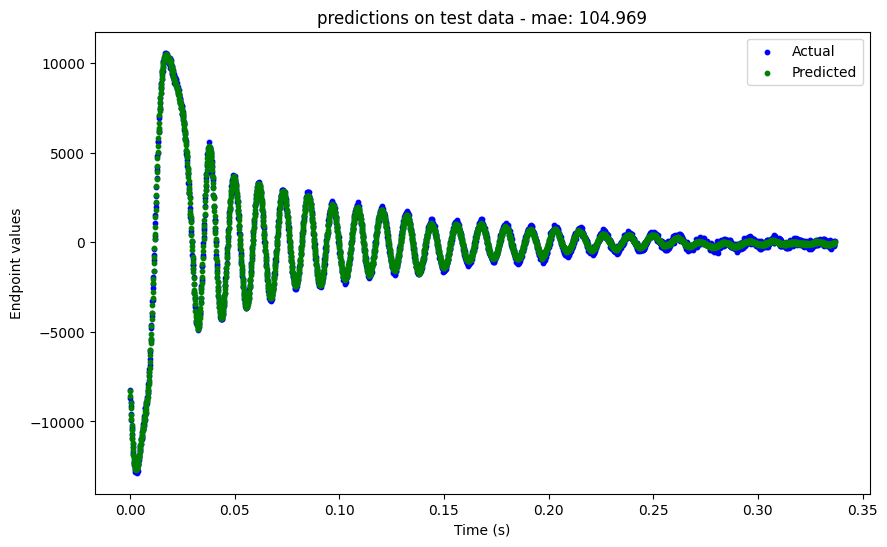

epoch 55
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11574.9414 - mae: 87.5243 - val_loss: 14868.6191 - val_mae: 100.1592
Epoch 2/2
85/85 [==============================] - 0s 926us/step


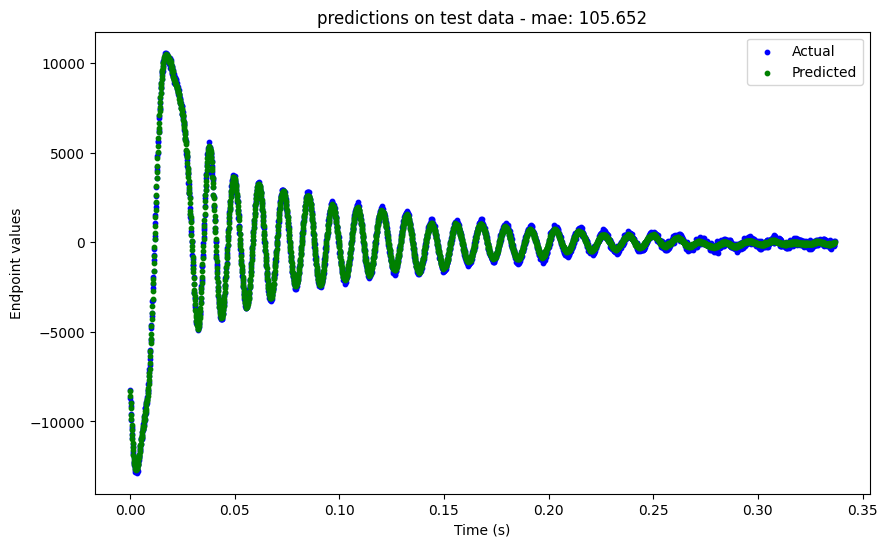

epoch 56
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11574.7539 - mae: 87.5184 - val_loss: 14897.1543 - val_mae: 100.1857
Epoch 2/2
85/85 [==============================] - 0s 904us/step


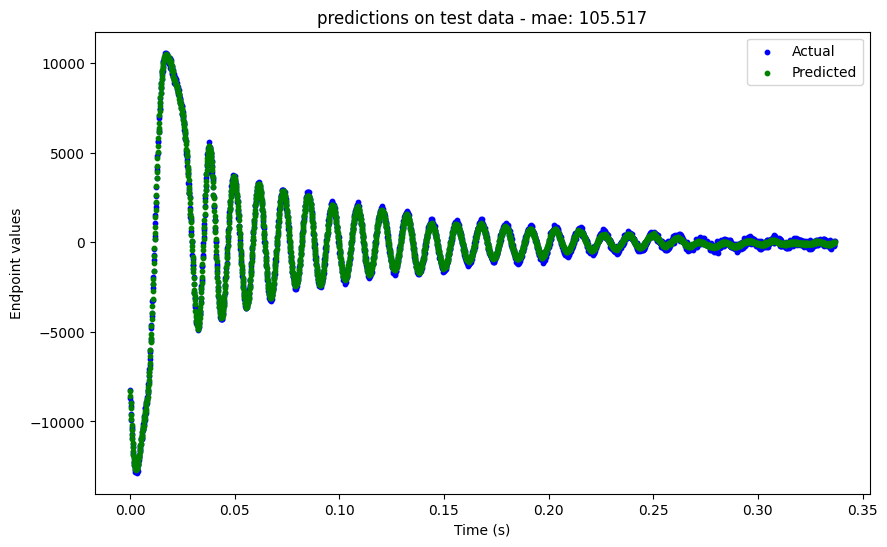

epoch 57
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11569.8975 - mae: 87.4963 - val_loss: 14889.4375 - val_mae: 100.1748
Epoch 2/2
85/85 [==============================] - 0s 923us/step


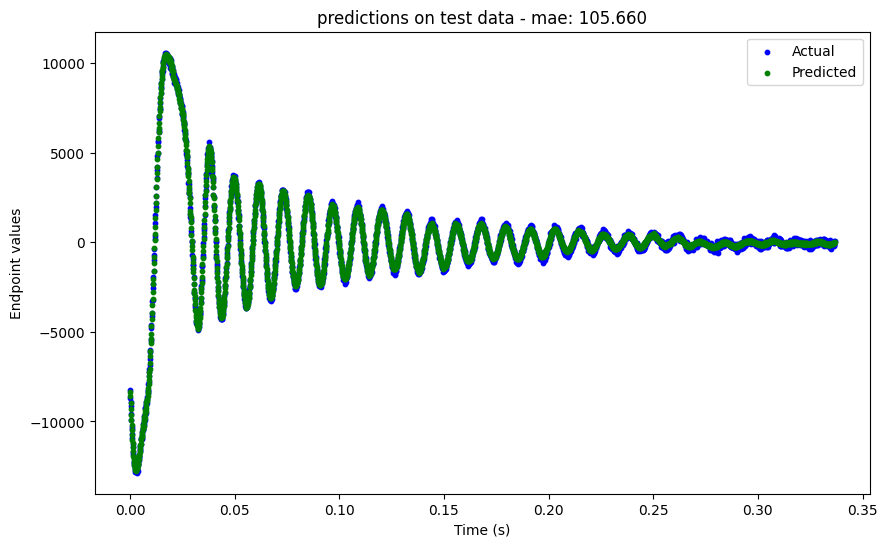

epoch 58
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11559.4521 - mae: 87.4846 - val_loss: 14968.6279 - val_mae: 100.3266
Epoch 2/2
85/85 [==============================] - 0s 940us/step


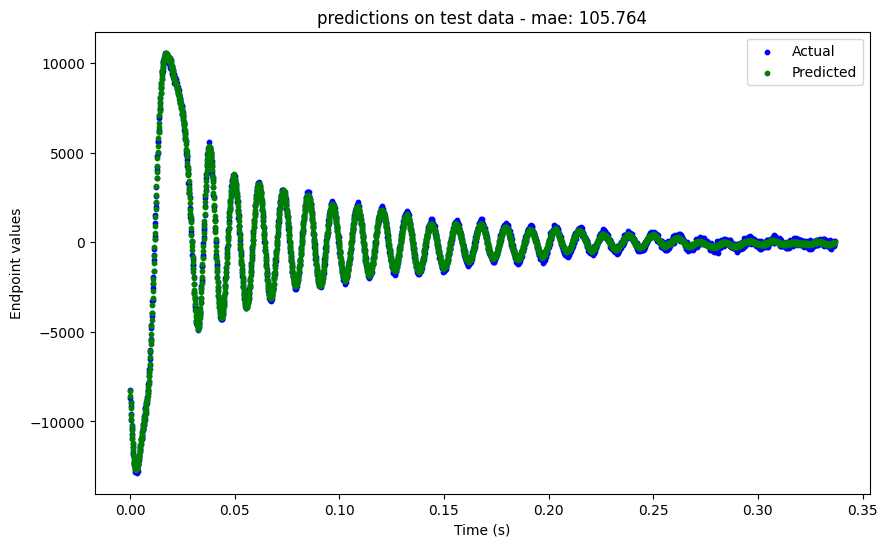

epoch 59
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11558.1875 - mae: 87.4502 - val_loss: 14918.9678 - val_mae: 100.2442
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


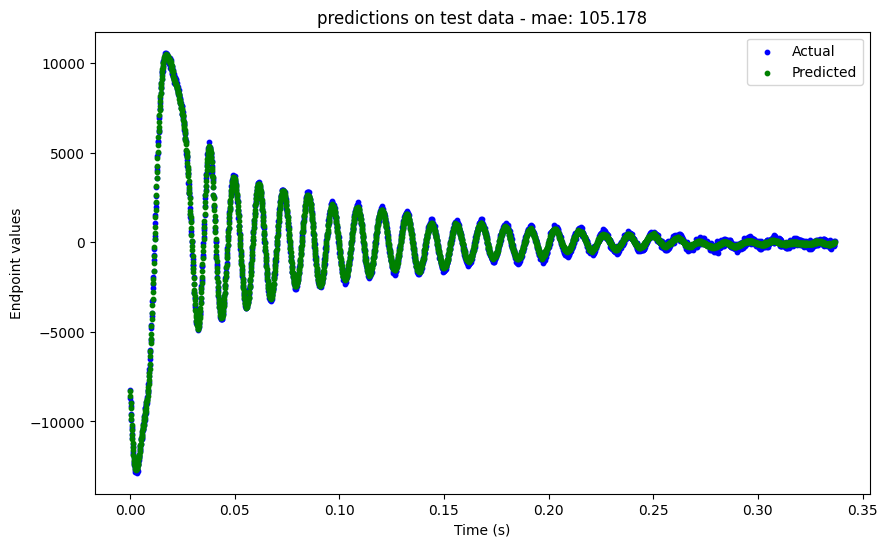

epoch 60
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11539.9473 - mae: 87.3628 - val_loss: 14911.9834 - val_mae: 100.2389
Epoch 2/2
85/85 [==============================] - 0s 935us/step


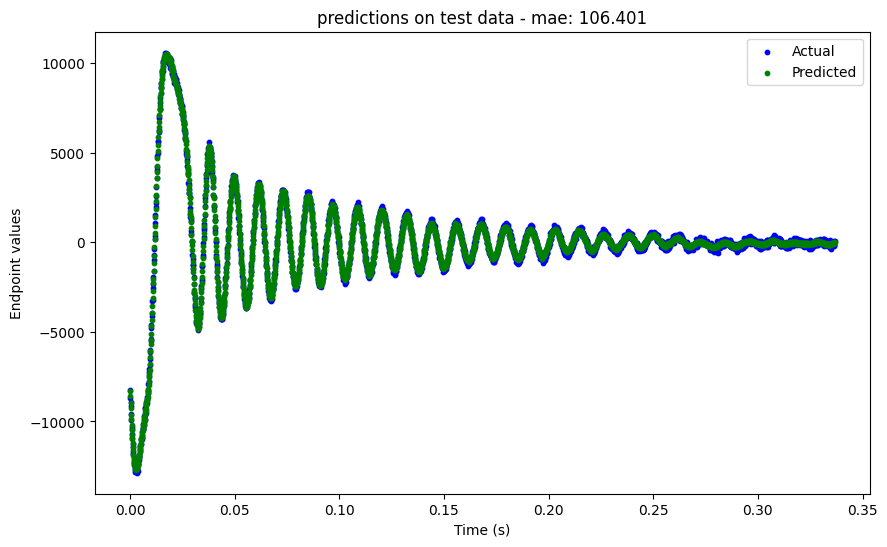

epoch 61
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11533.7881 - mae: 87.3453 - val_loss: 14964.0752 - val_mae: 100.2938
Epoch 2/2
85/85 [==============================] - 0s 913us/step


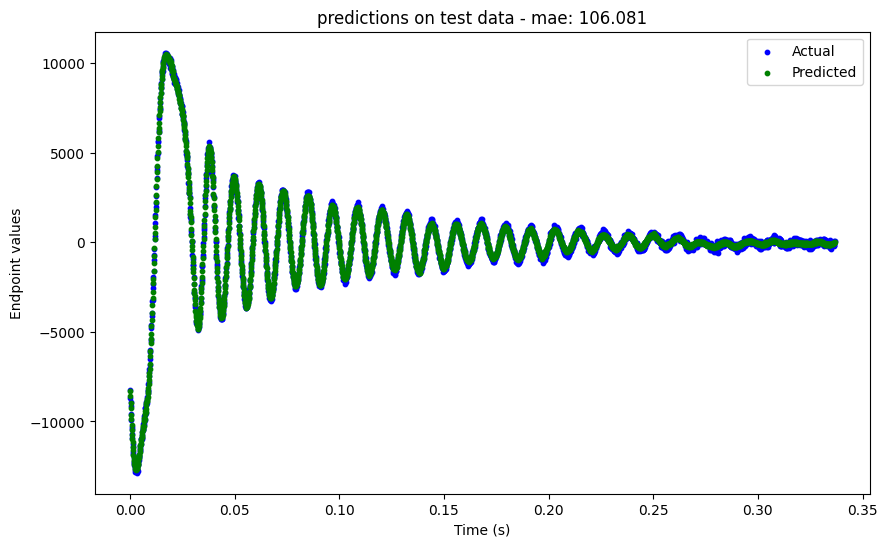

epoch 62
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11529.2617 - mae: 87.3127 - val_loss: 14940.9609 - val_mae: 100.2749
Epoch 2/2
85/85 [==============================] - 0s 905us/step


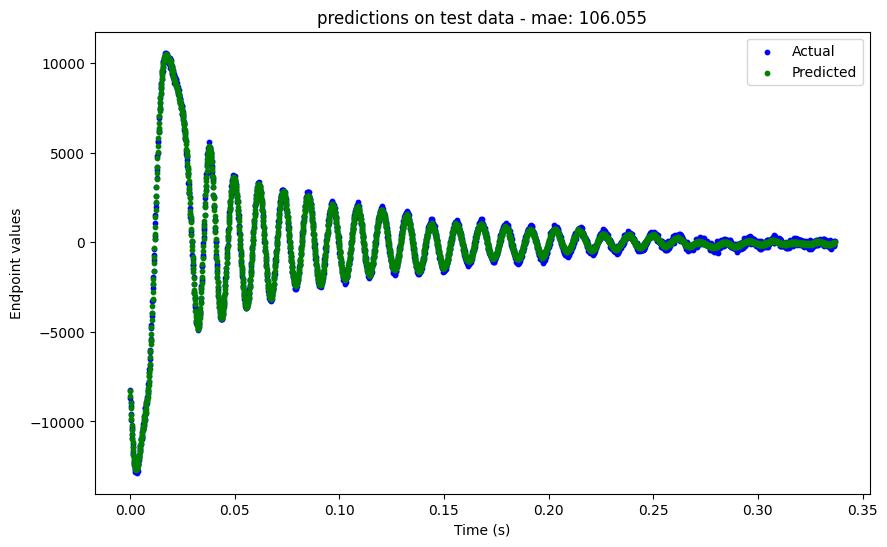

epoch 63
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11499.9805 - mae: 87.2124 - val_loss: 14952.5488 - val_mae: 100.4089
Epoch 2/2
85/85 [==============================] - 0s 909us/step


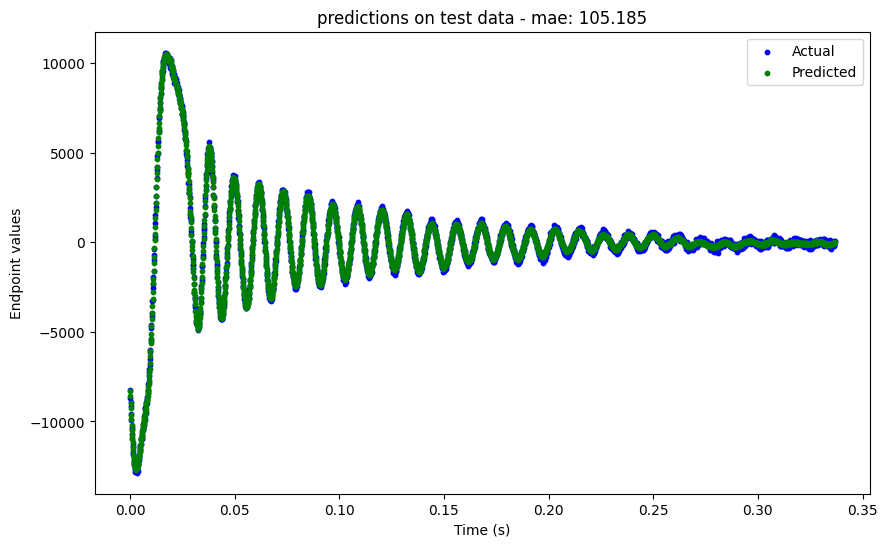

epoch 64
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11496.2568 - mae: 87.2069 - val_loss: 14917.1045 - val_mae: 100.2241
Epoch 2/2
85/85 [==============================] - 0s 926us/step


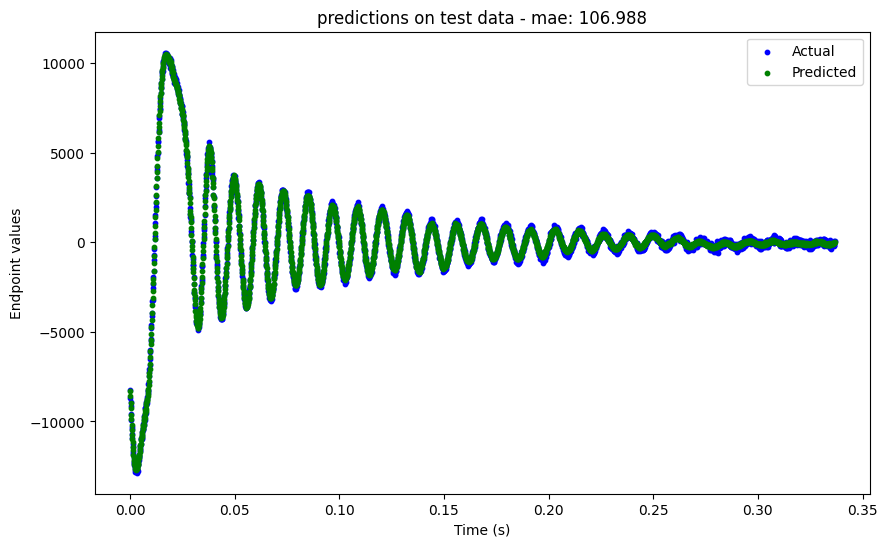

epoch 65
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11486.9160 - mae: 87.1824 - val_loss: 15020.5684 - val_mae: 100.4773
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


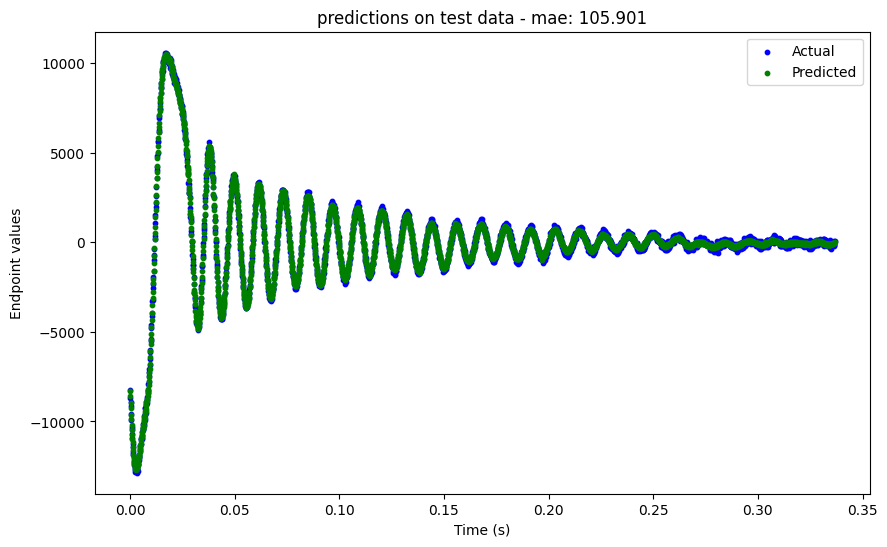

epoch 66
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 11488.2852 - mae: 87.1497 - val_loss: 14969.1201 - val_mae: 100.3215
Epoch 2/2
85/85 [==============================] - 0s 979us/step


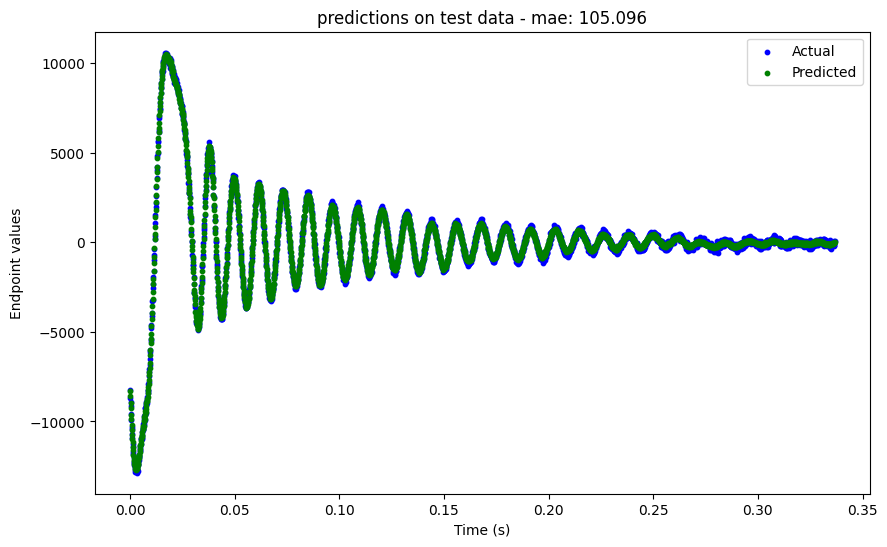

epoch 67
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11471.1289 - mae: 87.0825 - val_loss: 14957.4883 - val_mae: 100.2622
Epoch 2/2
85/85 [==============================] - 0s 929us/step


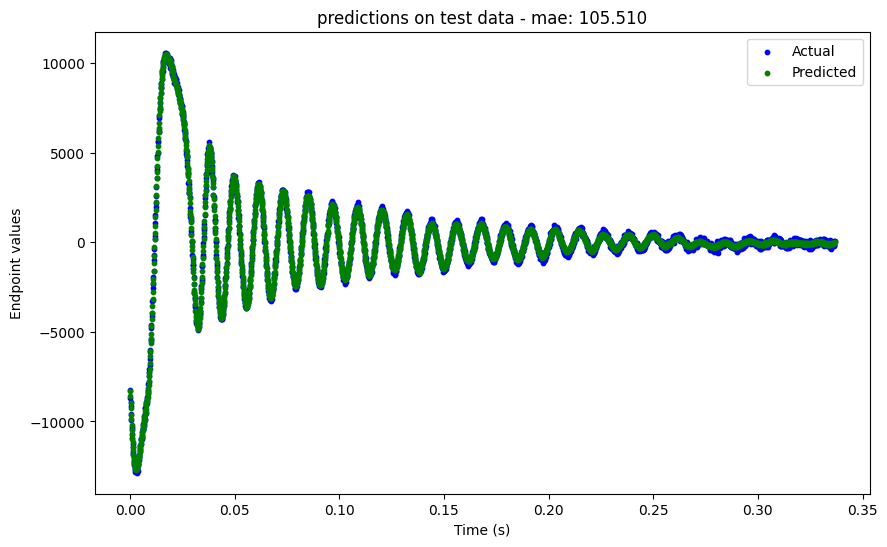

epoch 68
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11467.0117 - mae: 87.0872 - val_loss: 14988.9561 - val_mae: 100.3805
Epoch 2/2
85/85 [==============================] - 0s 943us/step


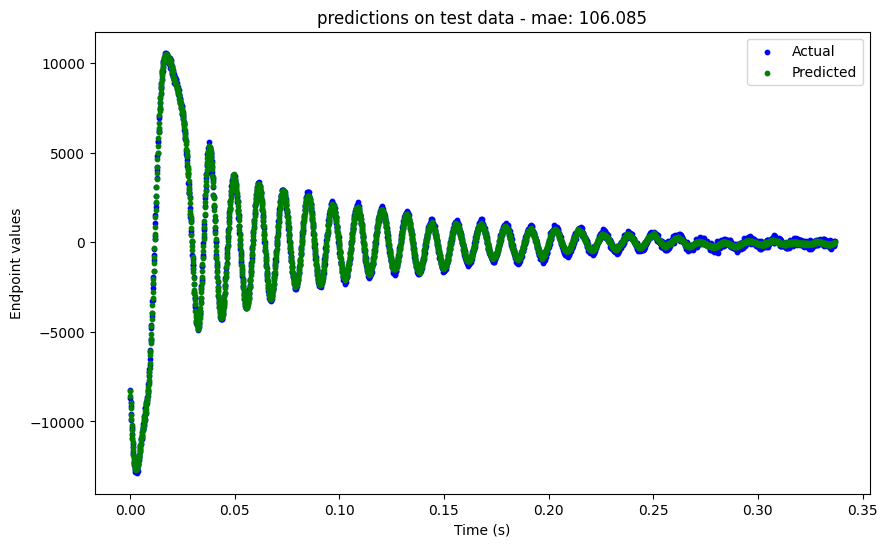

epoch 69
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11456.0771 - mae: 87.0175 - val_loss: 14986.3379 - val_mae: 100.4668
Epoch 2/2
85/85 [==============================] - 0s 913us/step


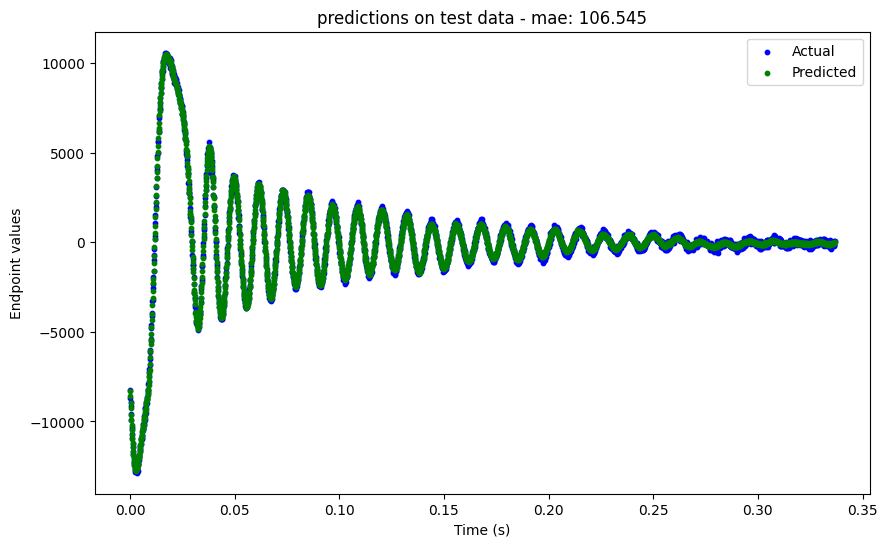

epoch 70
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11440.4121 - mae: 86.9699 - val_loss: 15022.1543 - val_mae: 100.5029
Epoch 2/2
85/85 [==============================] - 0s 939us/step


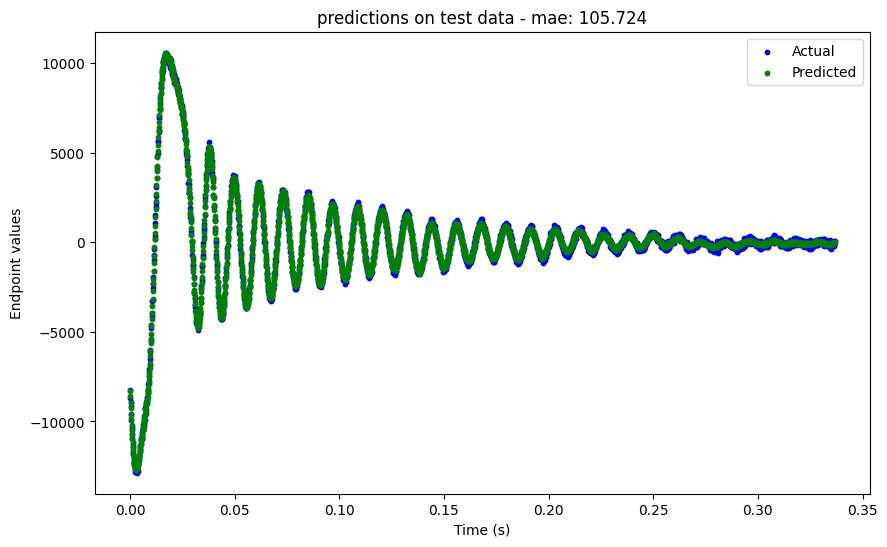

epoch 71
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11429.2275 - mae: 86.9087 - val_loss: 14972.7217 - val_mae: 100.3700
Epoch 2/2
85/85 [==============================] - 0s 913us/step


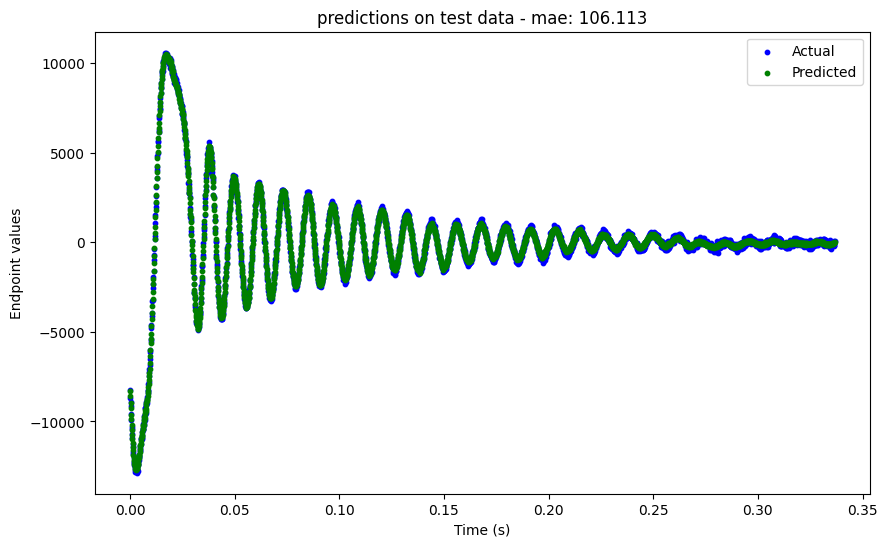

epoch 72
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11421.4854 - mae: 86.8975 - val_loss: 14993.7646 - val_mae: 100.4632
Epoch 2/2
85/85 [==============================] - 0s 921us/step


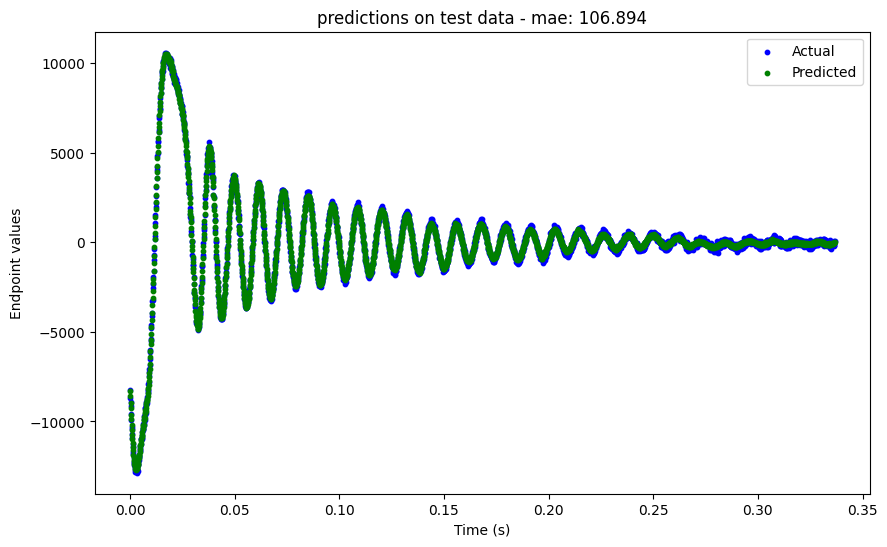

epoch 73
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11417.8145 - mae: 86.8711 - val_loss: 15041.2568 - val_mae: 100.5351
Epoch 2/2
85/85 [==============================] - 0s 916us/step


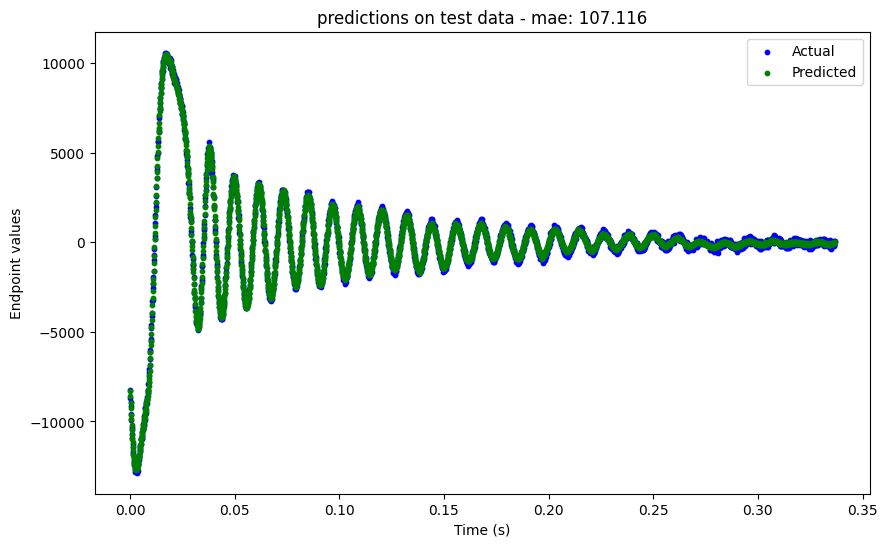

epoch 74
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11403.7900 - mae: 86.8069 - val_loss: 15071.7031 - val_mae: 100.7458
Epoch 2/2
85/85 [==============================] - 0s 912us/step


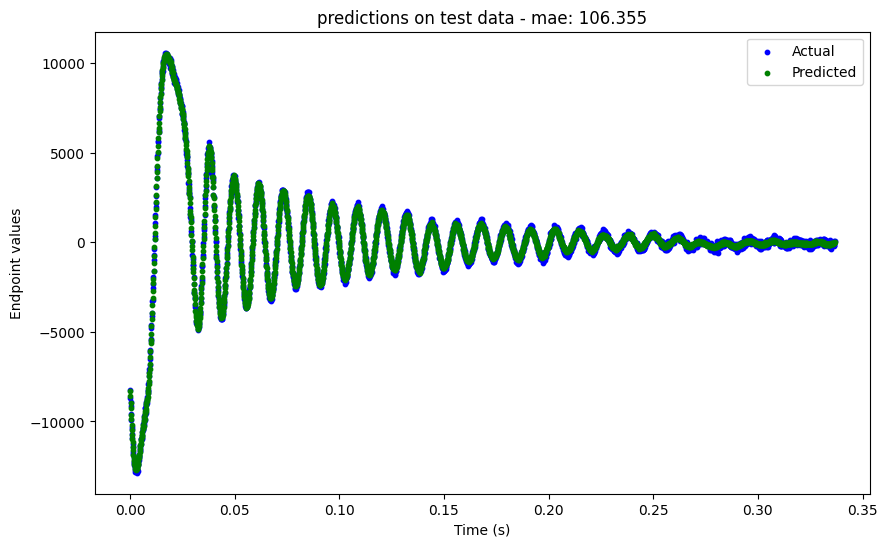

epoch 75
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11392.4326 - mae: 86.7881 - val_loss: 15061.3779 - val_mae: 100.5787
Epoch 2/2
85/85 [==============================] - 0s 885us/step


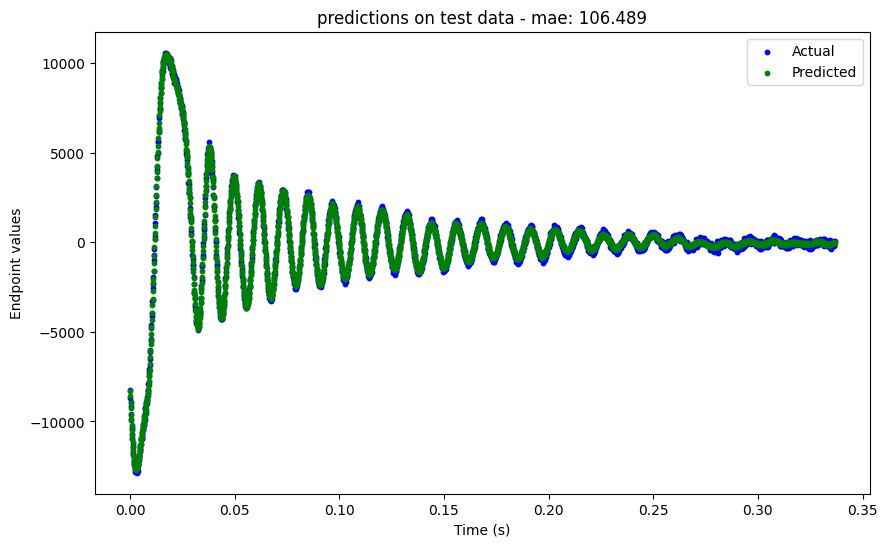

epoch 76
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11385.4980 - mae: 86.7489 - val_loss: 15049.3311 - val_mae: 100.4692
Epoch 2/2
85/85 [==============================] - 0s 900us/step


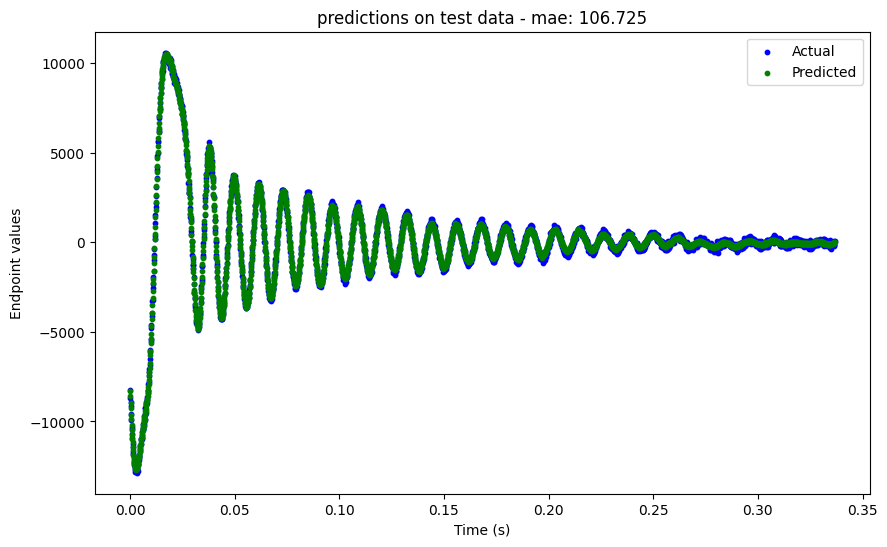

epoch 77
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11375.1855 - mae: 86.7184 - val_loss: 15074.6279 - val_mae: 100.6796
Epoch 2/2
85/85 [==============================] - 0s 915us/step


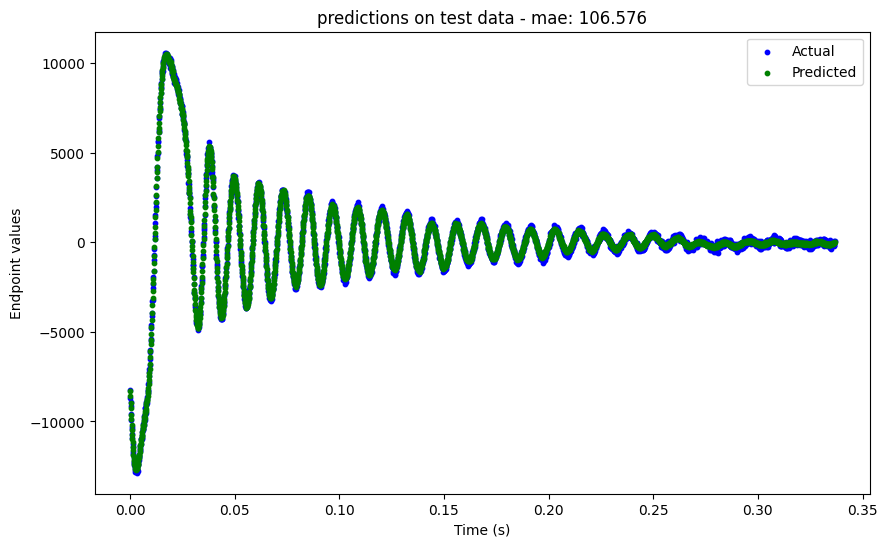

epoch 78
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11362.1426 - mae: 86.6463 - val_loss: 15186.8252 - val_mae: 100.9683
Epoch 2/2
85/85 [==============================] - 0s 895us/step


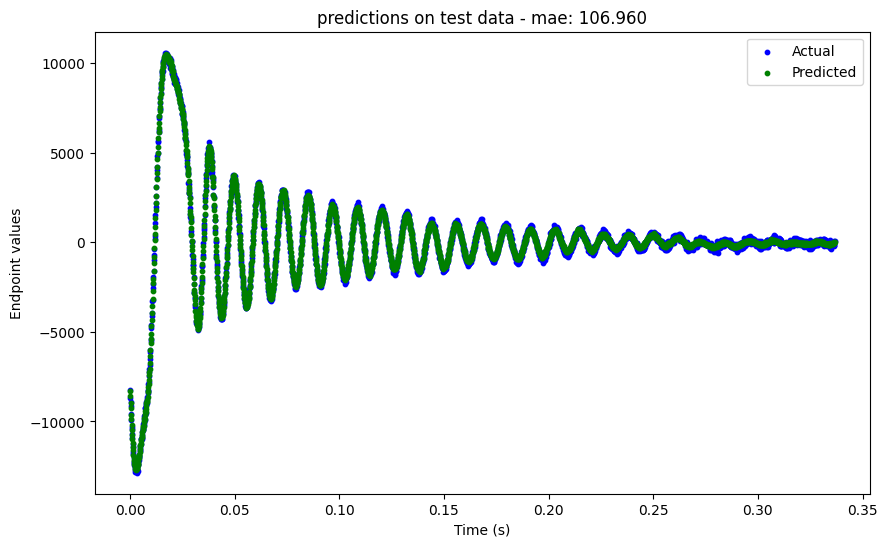

epoch 79
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11351.8623 - mae: 86.6038 - val_loss: 15047.9766 - val_mae: 100.6265
Epoch 2/2
85/85 [==============================] - 0s 915us/step


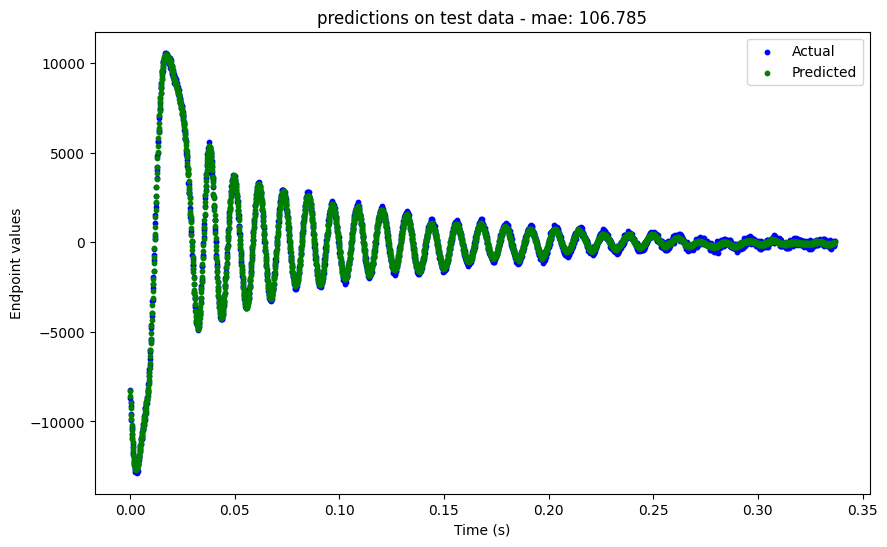

epoch 80
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11360.9932 - mae: 86.6536 - val_loss: 15102.6055 - val_mae: 100.7045
Epoch 2/2
85/85 [==============================] - 0s 904us/step


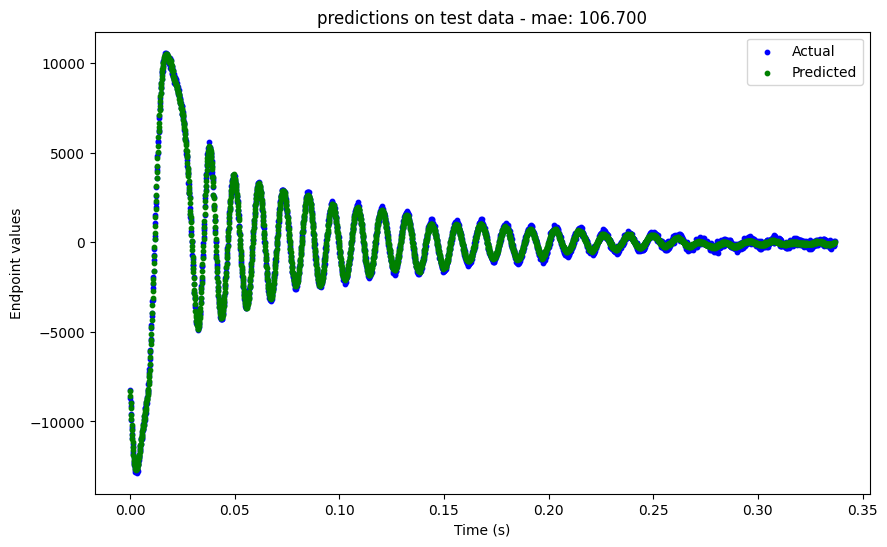

epoch 81
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11336.3936 - mae: 86.5246 - val_loss: 15012.3506 - val_mae: 100.5135
Epoch 2/2
85/85 [==============================] - 0s 925us/step


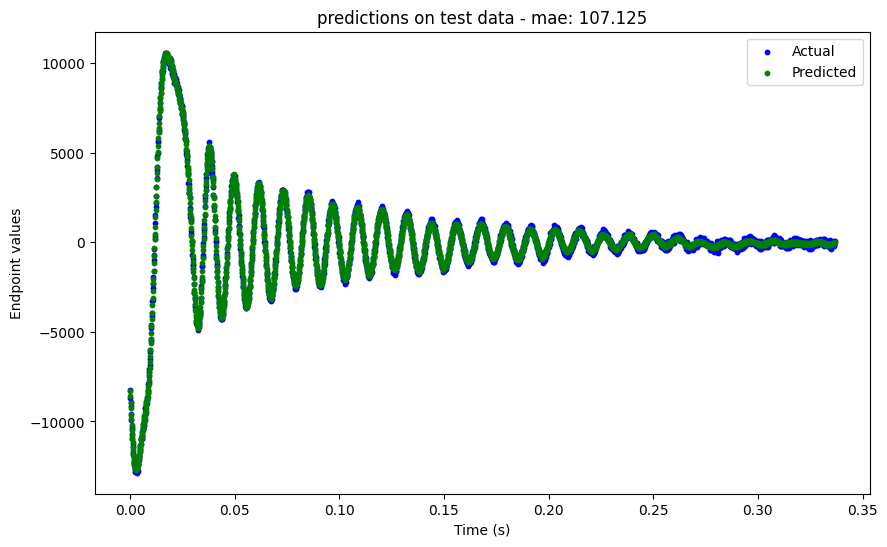

epoch 82
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11333.3750 - mae: 86.5269 - val_loss: 15072.5176 - val_mae: 100.6320
Epoch 2/2
85/85 [==============================] - 0s 889us/step


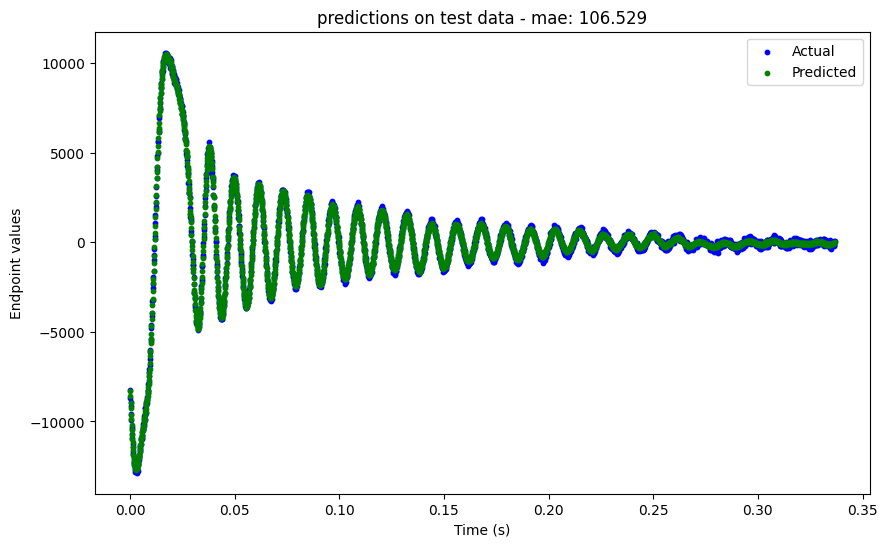

epoch 83
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11334.1885 - mae: 86.5292 - val_loss: 15058.3750 - val_mae: 100.5995
Epoch 2/2
85/85 [==============================] - 0s 905us/step


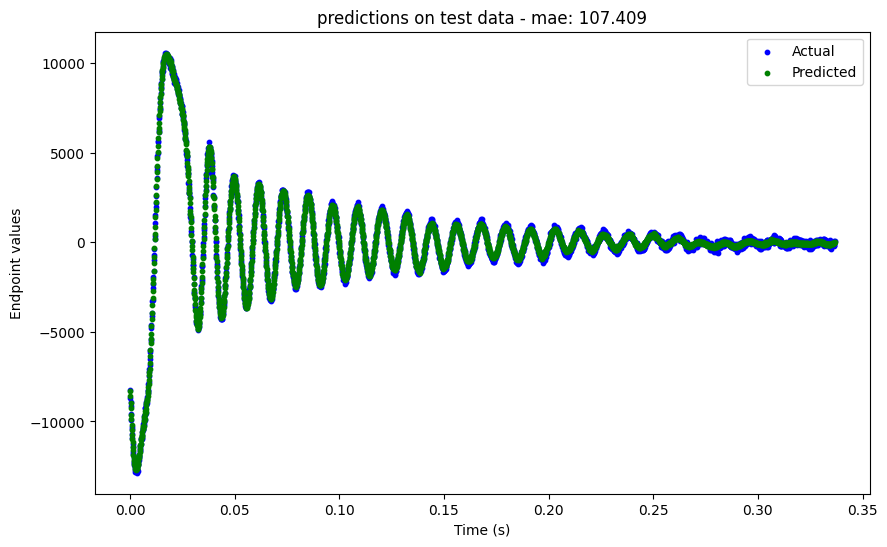

epoch 84
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11314.0488 - mae: 86.4328 - val_loss: 15112.1553 - val_mae: 100.7933
Epoch 2/2
85/85 [==============================] - 0s 939us/step


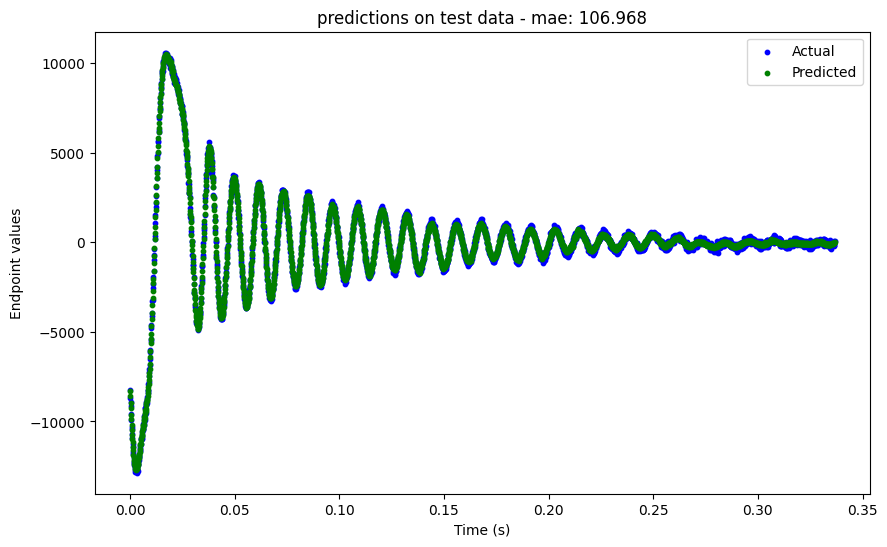

epoch 85
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11306.0723 - mae: 86.4000 - val_loss: 15182.9199 - val_mae: 101.0211
Epoch 2/2
85/85 [==============================] - 0s 901us/step


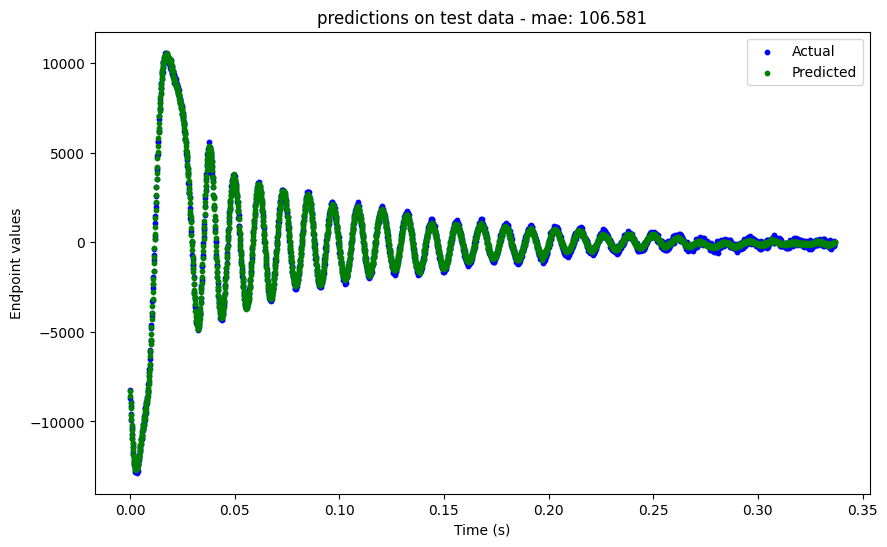

epoch 86
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11299.5078 - mae: 86.3888 - val_loss: 15181.4258 - val_mae: 101.0013
Epoch 2/2
85/85 [==============================] - 0s 908us/step


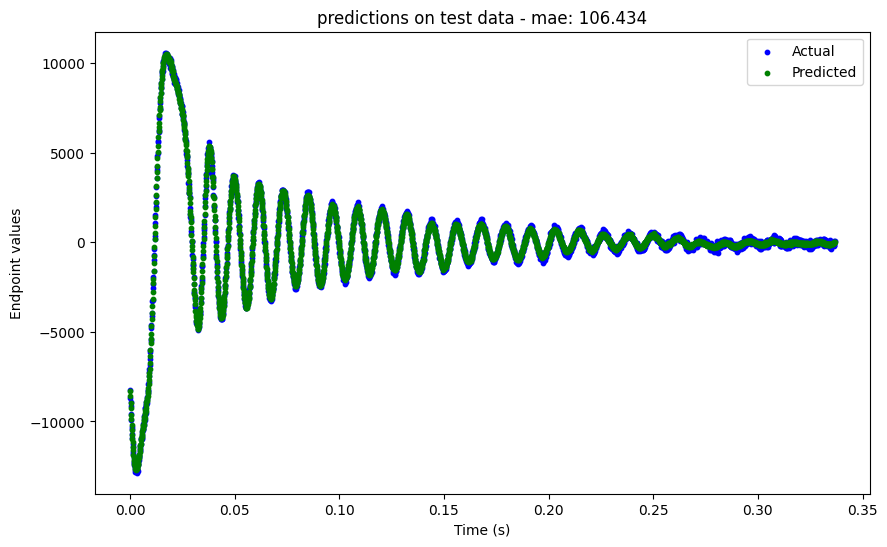

epoch 87
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11286.6572 - mae: 86.3273 - val_loss: 15233.8486 - val_mae: 101.1457
Epoch 2/2
85/85 [==============================] - 0s 909us/step


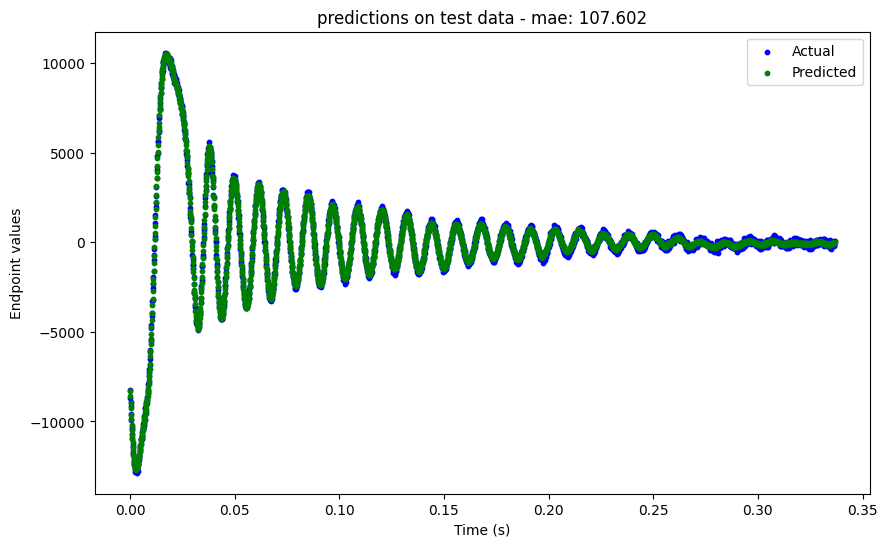

epoch 88
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11282.6045 - mae: 86.3184 - val_loss: 15307.1758 - val_mae: 101.4337
Epoch 2/2
85/85 [==============================] - 0s 922us/step


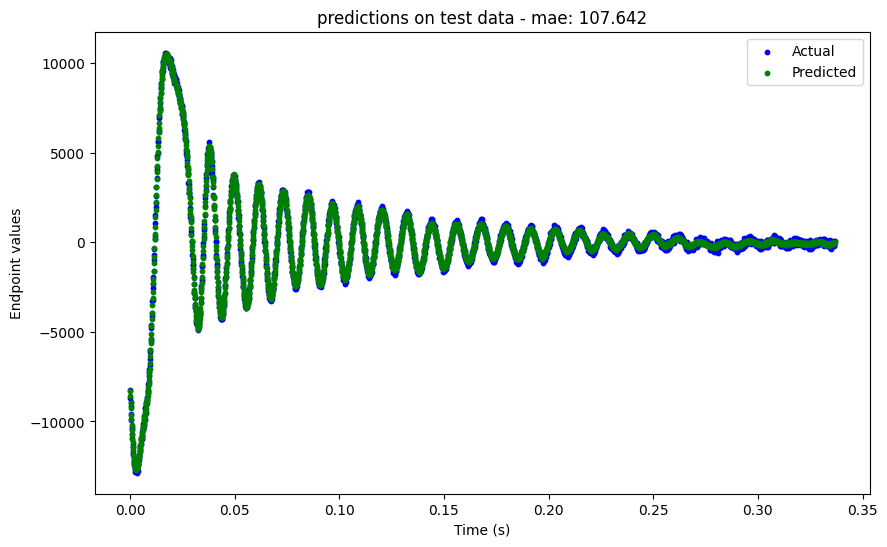

epoch 89
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11285.1113 - mae: 86.2720 - val_loss: 15211.4805 - val_mae: 101.0894
Epoch 2/2
85/85 [==============================] - 0s 946us/step


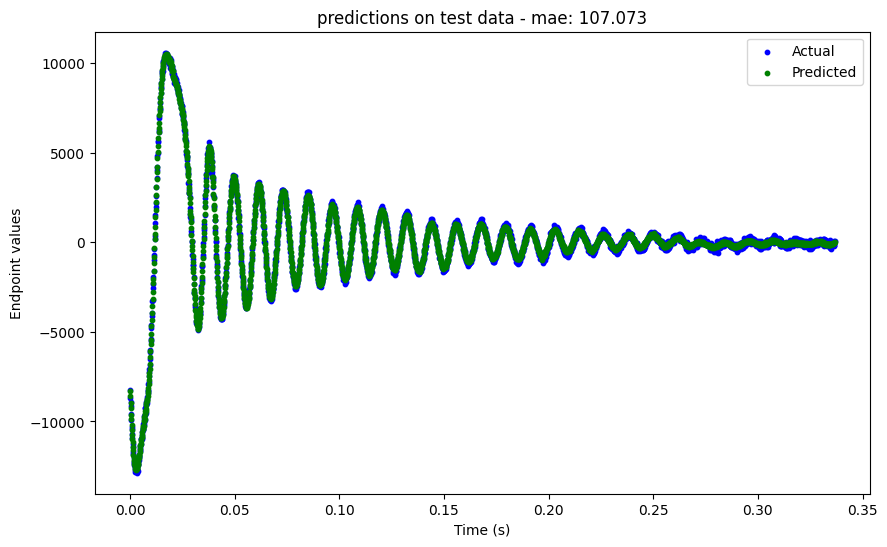

epoch 90
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11266.6357 - mae: 86.2067 - val_loss: 15192.2236 - val_mae: 101.0227
Epoch 2/2
85/85 [==============================] - 0s 903us/step


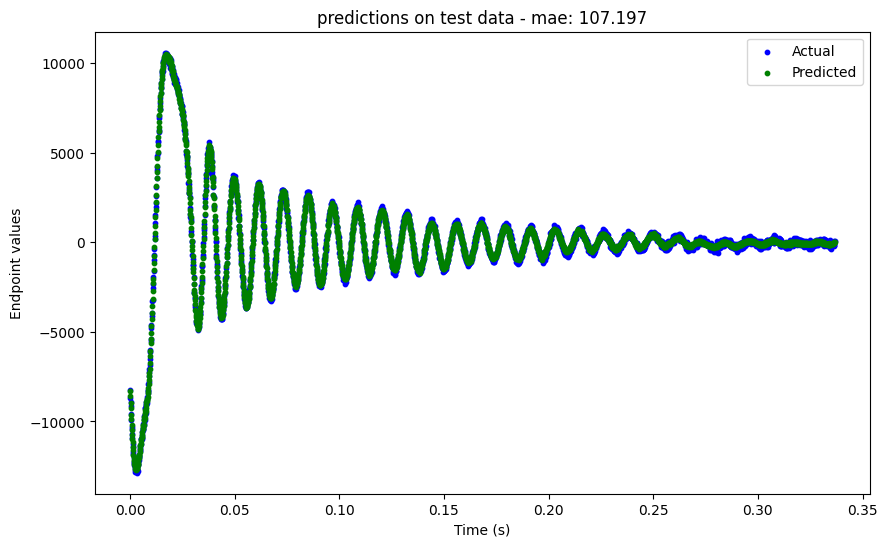

epoch 91
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11260.8945 - mae: 86.2137 - val_loss: 15164.5156 - val_mae: 100.9709
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


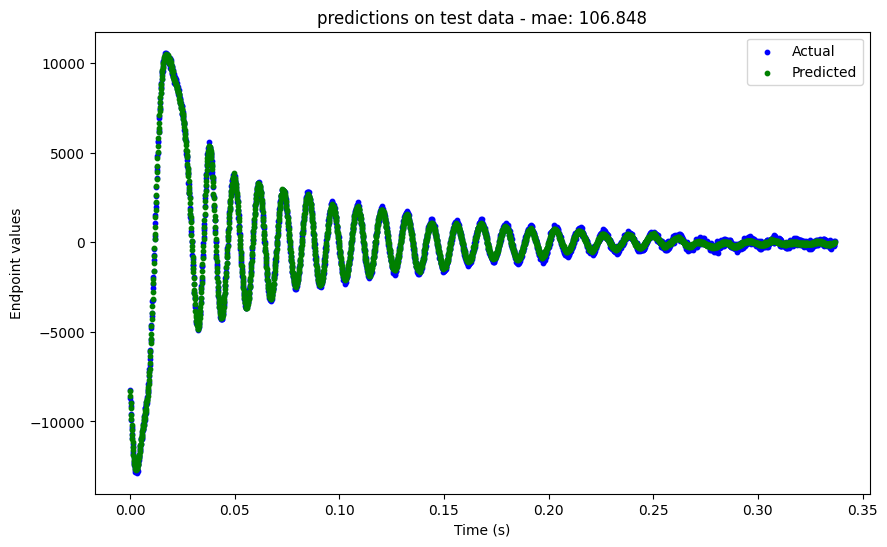

epoch 92
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11247.8389 - mae: 86.1487 - val_loss: 15180.7764 - val_mae: 101.0466
Epoch 2/2
85/85 [==============================] - 0s 919us/step


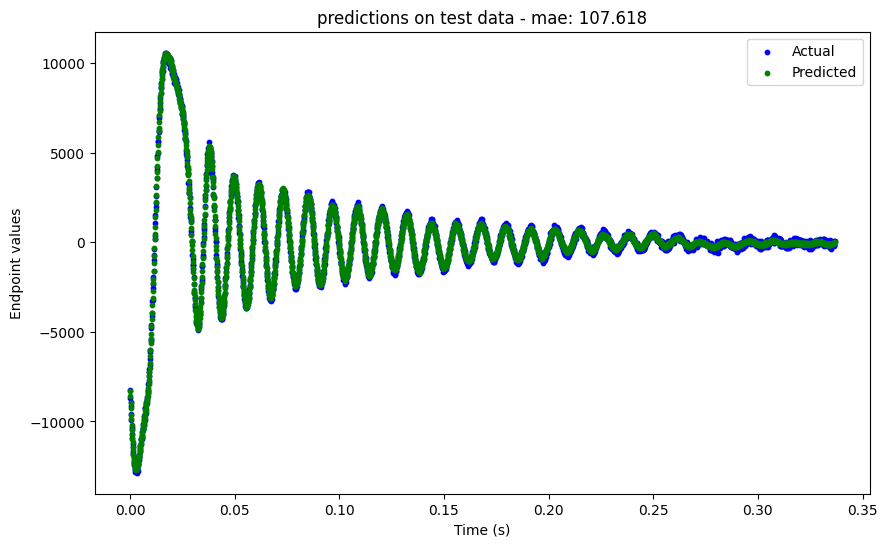

epoch 93
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11241.2451 - mae: 86.1291 - val_loss: 15311.8994 - val_mae: 101.3562
Epoch 2/2
85/85 [==============================] - 0s 931us/step


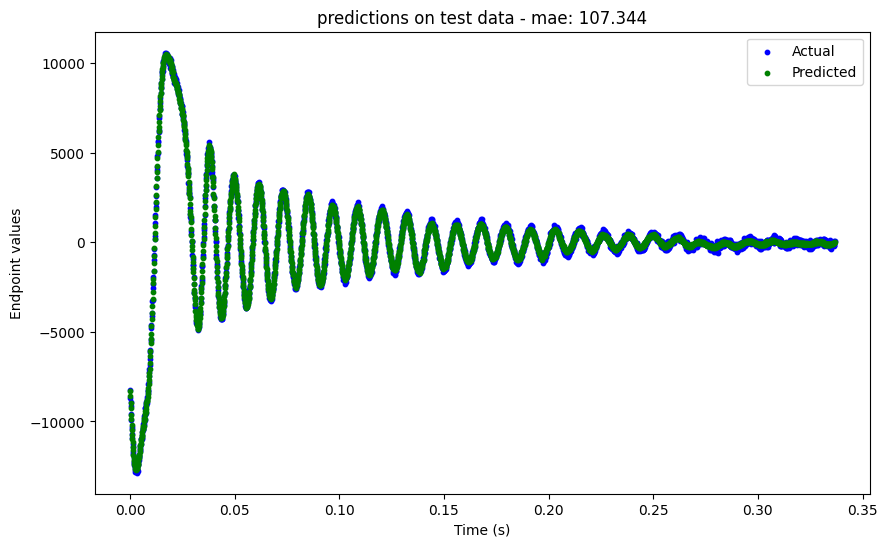

epoch 94
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11238.7969 - mae: 86.1062 - val_loss: 15206.0400 - val_mae: 101.0806
Epoch 2/2
85/85 [==============================] - 0s 913us/step


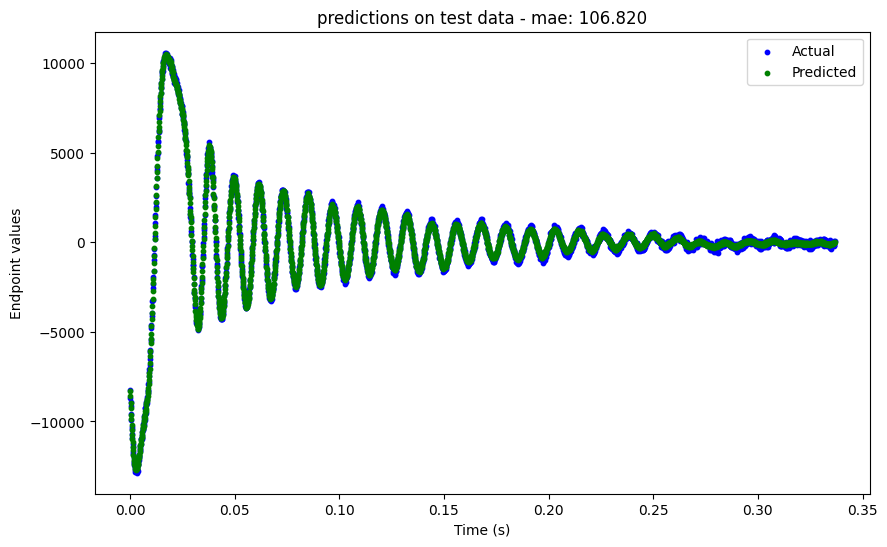

epoch 95
Epoch 1/2
4610/4610 [==============================] - 7s 2ms/step - loss: 11235.5312 - mae: 86.1057 - val_loss: 15286.4863 - val_mae: 101.2451
Epoch 2/2
85/85 [==============================] - 0s 942us/step


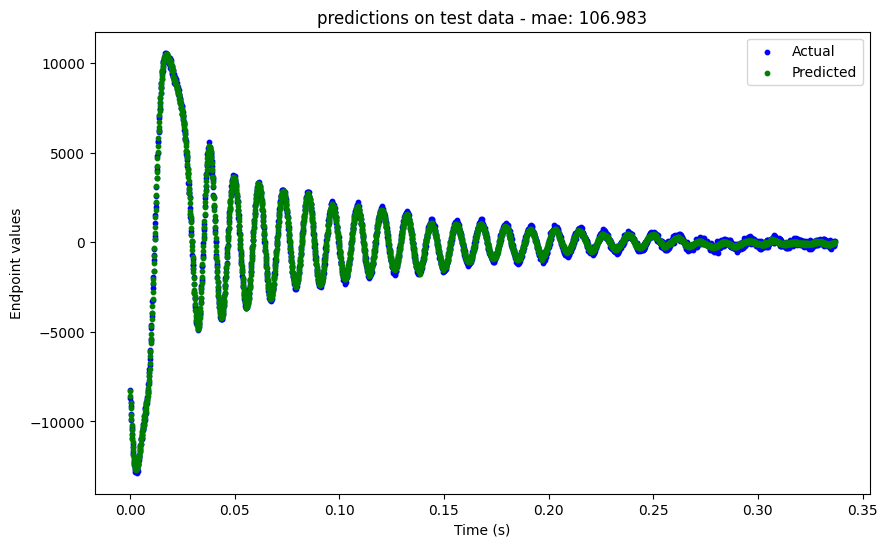

epoch 96
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11244.4150 - mae: 86.0990 - val_loss: 15156.3389 - val_mae: 100.9151
Epoch 2/2
85/85 [==============================] - 0s 1ms/step


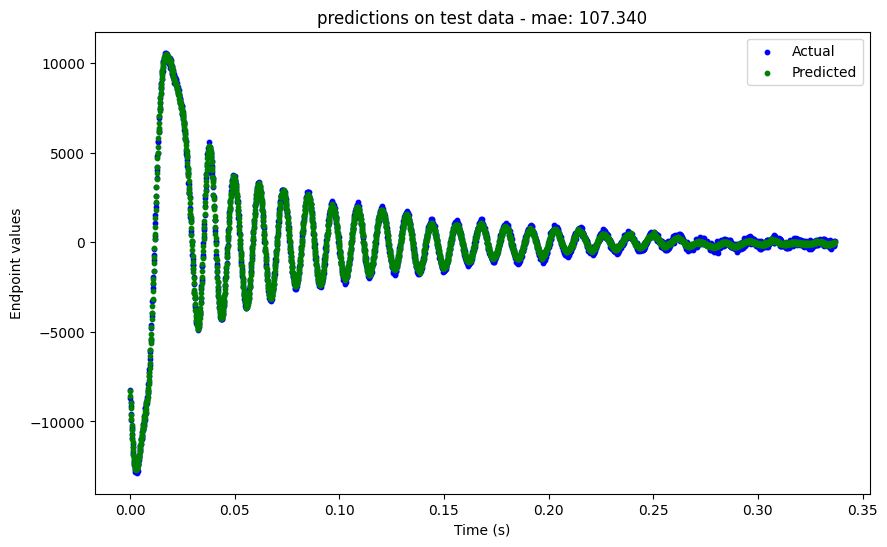

epoch 97
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11216.3584 - mae: 86.0345 - val_loss: 15176.8086 - val_mae: 100.9374
Epoch 2/2
85/85 [==============================] - 0s 919us/step


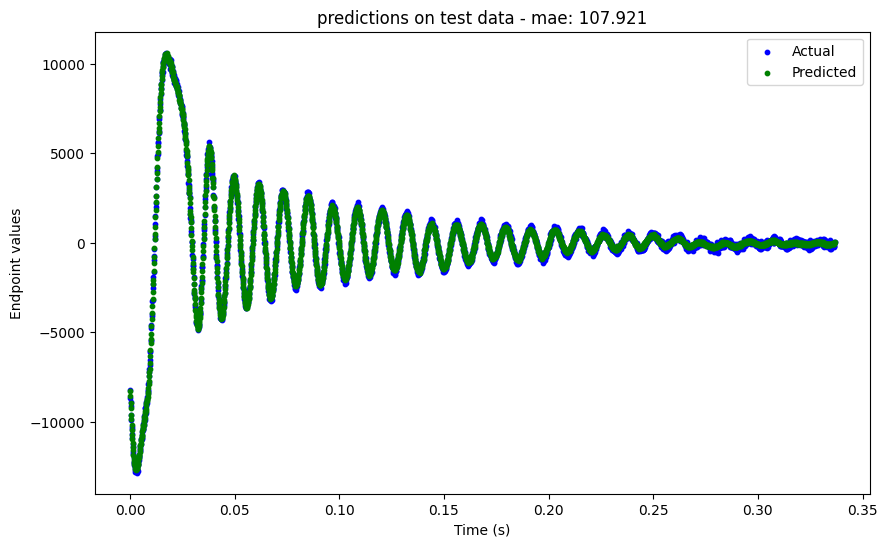

epoch 98
Epoch 1/2
4610/4610 [==============================] - 9s 2ms/step - loss: 11213.2676 - mae: 86.0345 - val_loss: 15311.7861 - val_mae: 101.3311
Epoch 2/2
85/85 [==============================] - 0s 954us/step


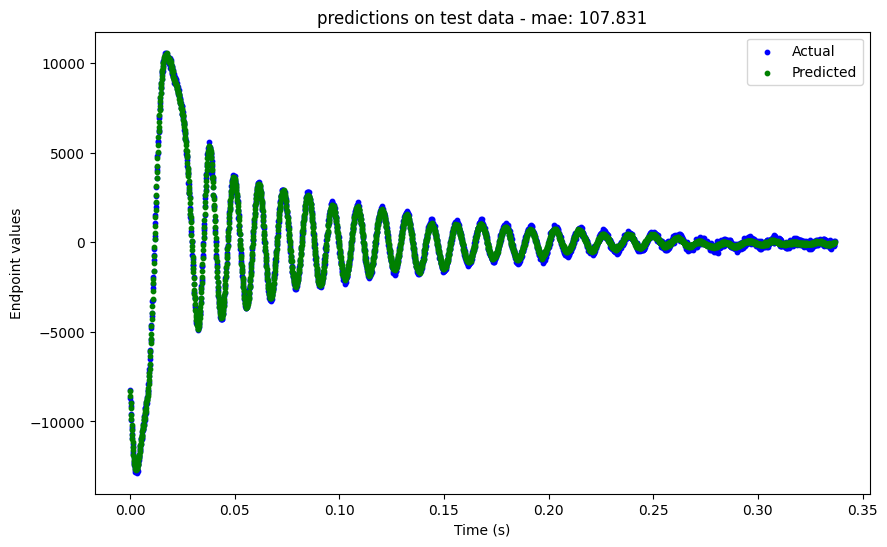

epoch 99
Epoch 1/2
4610/4610 [==============================] - 8s 2ms/step - loss: 11199.5947 - mae: 85.9553 - val_loss: 15350.7793 - val_mae: 101.4592
Epoch 2/2
85/85 [==============================] - 0s 943us/step


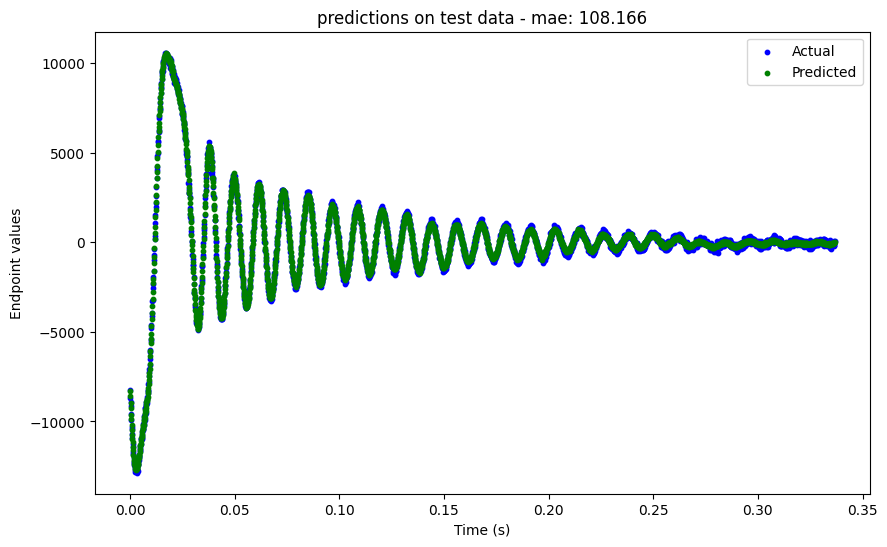

In [55]:
mae_reference = mae(y_target_one_trial.flatten(), y_mean_one_trial.flatten()) #for reference, this is the value we would get if model predicts 0 every time. (just the difference between the mean and the target)

print(f"mae reference: {mae_reference:.3f}")

outer_history= []
mae_test_array = []
for i in range(50):
    print(f"epoch {50 + i}")

    
    # history = model.fit(X, output_norm(y), epochs=2, batch_size=32, validation_data = (X_test, output_norm(y_test))) #with output norm
    history = model.fit(X, y, epochs=2, batch_size=32, validation_data = (X_test, y_test)) #without output norm
    outer_history.append(history.history)

    times = np.array(range(len(X_test_one_trial))) / 8000

    predictions_one_trial_raw = model.predict(X_test_one_trial)

    # predictions_one_trial_inversed = inverse_output_norm(predictions_one_trial_raw).numpy() #with output norm
    predictions_one_trial_inversed = predictions_one_trial_raw #without output norm

    #adding predictions to mean target to get actual prediction value:
    predictions_one_trial_actual = predictions_one_trial_inversed + y_mean_one_trial 
    
    mae_test = mae(y_target_one_trial.flatten(), predictions_one_trial_actual.flatten())
    mae_test_array.append(mae_test.numpy())
    # mae_test = mae(y_test_one_trial.flatten(), inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy().flatten())

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(times, y_target_one_trial.flatten(), color='blue', label='Actual', s = 10)
    plt.scatter(times, predictions_one_trial_actual.flatten(), color='green', label='Predicted', s=10)
    # plt.scatter(times, inverse_output_norm(inverse_mapping_func(predictions_one_trial)).numpy(), color='green', label='Predicted', s=10)


    # plt.title(f'predictions on test data - RMSE: {rmse_test:.3f}')
    plt.title(f'predictions on test data - mae: {mae_test:.3f}')

    plt.xlabel('Time (s)')
    plt.ylabel('Endpoint values')
    plt.legend()
    plt.show()

In [56]:
outer_history_50_100 = outer_history.copy()
mae_test_array_50_100 = mae_test_array.copy()

In [53]:
outer_history_0_50 = outer_history.copy()
mae_test_array_0_50 = mae_test_array.copy()

In [62]:
mae_test_array_0_50.append(mae_test_array_50_100)

In [74]:
a = [i["mae"] for i in outer_history_0_50]
a.extend([i["mae"] for i in outer_history_50_100])

b = [i["val_mae"] for i in outer_history_0_50]
b.extend([i["val_mae"] for i in outer_history_50_100])

c = []
c.extend(mae_test_array_0_50)
c.extend(mae_test_array_50_100)



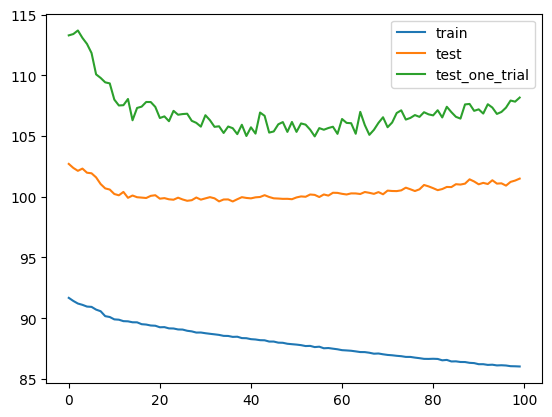

In [78]:
#0 -> 50 outer epochs (2 inner epochs each)

plt.plot(np.array(a[::2]).flatten(), label = "train")
plt.plot(np.array(b[::2]).flatten(), label = "test")
plt.plot(c, label = "test_one_trial")

plt.legend()

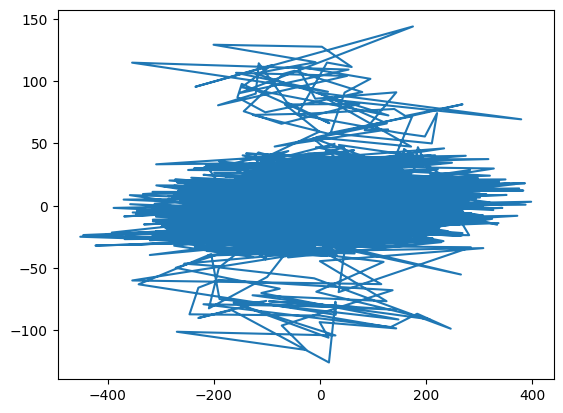

In [36]:
# plt.plot(predictions_one_trial_inversed)
plt.plot(y_test_one_trial, predictions_one_trial_inversed)

In [49]:
np.corrcoef(y_test_one_trial.flatten(), predictions_one_trial_inversed.flatten())

array([[1.       , 0.0752216],
       [0.0752216, 1.       ]])